__Python for Data Analysts: Methods & Tools - DAT-7466 - BMBAN1__

Team 7

Advisor:
Silvia Ariza

Authors: 
- Anas Suphakphaisarn
- Laura Garcia
- Mahika Gawande 
- Sephora Tshimbalanga 
- Thupilly Aravind Kumar


December 5th, 2023
***

# Analyzing Mental Illness and its relationship with Employment

In spite of the fact that nowadays mental health is a less taboo subject than it was before, there is still stigmatization that surrounds it; which is often accompanied by prejudices and discrimination. (Borenstein, 2020) 

Individuals with mental health illnesses and issues are often categorized; which in turn causes that people avoid to seek treatment or even get a diagnoses, for fear of losing their jobs or being cast out. (Borenstein, 2020)

***

Thus the purpose of analyzing this report, in which a survey dataset was analyzed in order to prove two different hypothesis regarding individuals with mental health illnesses and some stigmas that surround them: 

__Hypothesis 1: People with mental health illnesses lead a lesser quality life in terms of income, educational level, employment status, etc.__ 

__Hypothesis 2: People with mental health illnesses have to be dependent of others in order to have a place to live and a fixed income.__ 

The dataset that was used for analysis was obtained through Kaggle and created by Corley (2018). This datset comprises information related to a survey the author carried out; targeted to people with mental health issues. However, the data contains
sampling of people with and without mental illness. 

# Importing data and prepping Jupyter Notebook

The first step of the analysis, was to prepare Jupyter Notebook to receive the data. For this purpose, the different libraries were imported, a data path was created and a sample of the dataset was displayed (with the purpose of knowing how the data looked like). 

In [1423]:
import warnings 
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

np.random.seed(42)

In [1424]:
data_path= "./data/"
filename= 'mental_illness_employment.csv'
filename= pd.read_csv(data_path+filename)
ga_df=filename.copy()

In [1425]:
pd.set_option('display.max_columns', None) 
ga_df.sample(5)

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,I have one of the following issues in addition to my illness,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Age,Gender,Household Income,Region,Device Type
25,6.629996e+09,168522804.0,01/14/2018 09:07:44 PM,01/14/2018 09:10:03 PM,NaN,NaN,NaN,NaN,cae9652acdd67f460133a50b4a,No,Some Masters,Yes,No,0,Yes,No,Yes,No,Yes,18,75,No,Yes,1,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tiredness,30-44,Male,"$125,000-$149,999",Pacific,Windows Desktop / Laptop
109,6.629277e+09,168522804.0,01/14/2018 10:35:58 AM,01/14/2018 10:37:24 AM,NaN,NaN,NaN,NaN,60f4e4eb064a36c3e97e3a09fb,No,Completed Undergraduate,Yes,No,0,Yes,No,Yes,No,No,0,15,No,Yes,0,No,No,0,Lack of concentration,NaN,NaN,NaN,NaN,NaN,NaN,Tiredness,45-60,Male,"$125,000-$149,999",Middle Atlantic,Android Phone / Tablet
76,6.629342e+09,168522804.0,01/14/2018 12:08:52 PM,01/14/2018 12:10:24 PM,NaN,NaN,NaN,NaN,924f8eb3bef0cbef7d1a02865b,No,Some Undergraduate,Yes,No,0,Yes,No,Yes,No,Yes,53,73,No,No,0,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45-60,Male,"$125,000-$149,999",Middle Atlantic,Windows Desktop / Laptop
196,6.629197e+09,168522804.0,01/14/2018 08:29:28 AM,01/14/2018 08:32:59 AM,NaN,NaN,NaN,NaN,f37af819927cfb629da70f89da,No,Some Masters,Yes,No,0,Yes,No,Yes,No,No,0,73,No,Yes,0,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tiredness,30-44,Female,"$125,000-$149,999",New England,Windows Desktop / Laptop
57,6.629405e+09,168522804.0,01/14/2018 01:36:29 PM,01/14/2018 01:38:58 PM,NaN,NaN,NaN,NaN,d221e750b838bd771453edd628,No,Completed Undergraduate,Yes,Yes,13,Yes,No,Yes,No,Yes,23,39,No,Yes,0,No,No,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,> 60,Male,"$25,000-$49,999",Middle Atlantic,Windows Desktop / Laptop


In [1426]:
ga_df.shape

(335, 40)

In [1427]:
ga_df.columns

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Email Address', 'First Name', 'Last Name', 'Custom Data 1',
       'I identify as having a mental illness', 'Education',
       'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am currently employed at least part-time', 'I am legally disabled',
       'I have my regular access to the internet', 'I live with my parents',
       'I have a gap in my resume',
       'Total length of any gaps in my resume in months.',
       'Annual income (including any social welfare programs) in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'I have one of the f

Since the column names were too long and there were columns that were redundant to the analysis, the next step was to eliminate such columns and change the names of the remaining ones. 

In [1428]:
columns_to_drop = ['Respondent ID', 'Collector ID', 'Start Date', 'IP Address', 'Email Address', 'First Name', 'Last Name', 'Custom Data 1', 'I am unemployed', 'I read outside of work and school', 'How many days were you hospitalized for your mental illness', 'Annual income (including any social welfare programs) in USD']
ga_df = ga_df.drop(columns=columns_to_drop, axis=1)

new_column_names = {'End Date':'Timestamp', 'I identify as having a mental illness':'Mental Illness','Education':'Education level',
                    'I have my own computer separate from a smart phone':'Additional device','I have been hospitalized before for my mental illness':'Hospitalized for mental illness',
                    'How many times were you hospitalized for your mental illness':'Freq Hospitalization','I am currently employed at least part-time':'Employment status',
                    'I am legally disabled':'Legal disability','I have my regular access to the internet':'Access to internet','I live with my parents':'Living w/parents',
                    'I have a gap in my resume':'Gap in resume','Total length of any gaps in my resume in\xa0months.':'Number of gaps in resume', 
                   'Annual income (including any social welfare programs) in USD':'Annual income in USD','Annual income from social welfare programs':'Income from social wellfare',
                    'I receive food stamps':'Food stamps','I am on section 8 housing':'Section 8 housing','I have one of the following\xa0issues in addition to my illness':'Additional issues'}

new_column_names = {col.strip(): new_name for col, new_name in new_column_names.items()}


ga_df = ga_df.rename(columns=new_column_names)
ga_df.columns

Index(['Timestamp', 'Mental Illness', 'Education level', 'Additional device',
       'Hospitalized for mental illness', 'Employment status',
       'Legal disability', 'Access to internet', 'Living w/parents',
       'Gap in resume', 'Number of gaps in resume',
       'Income from social wellfare', 'Food stamps', 'Section 8 housing',
       'Freq Hospitalization', 'Additional issues', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Age', 'Gender', 'Household Income',
       'Region', 'Device Type'],
      dtype='object')

Following this, it was important to know how each column and its entries was being categorized by Python; since the nature of the analysis that can be made depends on such categorization. 

In [1429]:
ga_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Timestamp                        334 non-null    object
 1   Mental Illness                   335 non-null    object
 2   Education level                  335 non-null    object
 3   Additional device                335 non-null    object
 4   Hospitalized for mental illness  335 non-null    object
 5   Employment status                335 non-null    object
 6   Legal disability                 335 non-null    object
 7   Access to internet               335 non-null    object
 8   Living w/parents                 335 non-null    object
 9   Gap in resume                    335 non-null    object
 10  Number of gaps in resume         335 non-null    object
 11  Income from social wellfare      335 non-null    object
 12  Food stamps                      335

In [1430]:
ga_df_wo_index=ga_df.reset_index()
ga_df=ga_df_wo_index

In [1431]:
ga_df.head()

,index,Timestamp,Mental Illness,Education level,Additional device,Hospitalized for mental illness,Employment status,Legal disability,Access to internet,Living w/parents,Gap in resume,Number of gaps in resume,Income from social wellfare,Food stamps,Section 8 housing,Freq Hospitalization,Additional issues,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Age,Gender,Household Income,Region,Device Type
0,0,NaN,Response,Response,Response,Response,Response,Response,Response,Response,Response,Open-Ended Response,Open-Ended Response,Response,Response,Open-Ended Response,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Response,Response,Response,Response,Response
1,1,01/15/2018 03:48:24 AM,No,High School or GED,No,No,No,No,Yes,No,Yes,24,0,No,No,0,Lack of concentration,Anxiety,Depression,Obsessive thinking,NaN,Panic attacks,NaN,NaN,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
2,2,01/15/2018 03:18:57 AM,Yes,Some Phd,Yes,No,Yes,No,Yes,No,No,1,0,No,No,0,Lack of concentration,Anxiety,Depression,NaN,NaN,Panic attacks,NaN,Tiredness,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
3,3,01/15/2018 03:12:49 AM,No,Completed Undergraduate,Yes,No,Yes,No,Yes,No,No,0,0,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
4,4,01/15/2018 02:12:33 AM,No,Some Undergraduate,Yes,No,No,No,Yes,Yes,Yes,11,0,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop


Additionally, it was found that the first row of the dataset was redundant and therefore was eliminated. 

In [1432]:
ga_df.drop(0, inplace=True)

# What do the columns mean? What kind of data they have?

***
Once the dataset was explored, it was possible to know what kind of information each of the columns held and identify what needs to be cleaned. The columns within the dataset are:

- **Timestamp**: shows the time in which each respondent submitted their answers. 
- **Mental Illness**: whether the respondent has a diagnosed mental illness or not. The information is registered through Yes/No answers. 
- **Education level**: the degree that each respondent holds. The answers are a list of options that were provided to the respondent. 
- **Additional device**: this question within the survey aimed to ask respondents whether they own an additional device to the one they answered the survey from. 
- **Hospitalized for mental illness**: this column holds Yes/No answers and aimed to categorized if respondents had ever been hospitalized by a mental health issue within their lifetimes. 
- **Employment status**: whether the respondent was a job or not. 
- **Legal disability**: if the respondent is considered a person with disability legally. 
- **Access to the internet**:  whether the respondent has access to the internet or not.
- **Living w/parents**: if the respondent lives independently or lives with their parents. 
- **Gap in resume**: if the respondent has gaps within their resume (meaning that they have periods of time that are unaccounted for). 
- **Number of gaps in resume**: this question was open-ended and aimed to capture the amount of gaps the respondent has in their resume. 
- **Income from social wellfare**: this question was also open-ended and has the total income the respondent gets from social wellfare programs. 
- **Food stamps**: if the respondent is a food stamp recipient or not. 
- **Section 8 housing**: if the respondent lives within a section 8 house or not. 
- **Freq Hospitalization**: this column holds the amount of times the respondent has been hospitalized due to a mental health issue. 
- **Additional issues columns**: this columns asked respondents if they identify with having one of these additional mental health issues: lack of concentration, anxiety, depression, tiredness, obsessive thinking, mood swings, panic attacks and compulsive behavior.
- **Age**: this column holds age ranges in which each respondent is. 
- **Gender**: this column holds the respondent's gender. 
- **Household income**: this column holds income ranges that the respondent receives in dollars. 
- **Region**: the place from which the respondent is answering the survey from. 
- **Device type**: the type of device that the respondent is answering the survey from. 

# Data cleaning

***
The first step into analyzing the dataset, was to clean the information within it. Even when not all of the entries were reviewed previously, it is always safe to assume that the data needs to be cleaned. This includes: correcting errors within entries, changing the data type that is being recognized by Python, dealing with missing values and identifying outliers. 

The first step shown is fixing errors within each column and fixing the data type. 

**1.1 Timestamp**
   

In [1433]:
ga_df['Timestamp'].str.len().value_counts(dropna=False) 

Timestamp
22    334
Name: count, dtype: int64

In [1434]:
ga_df['Timestamp'].unique()

array(['01/15/2018 03:48:24 AM', '01/15/2018 03:18:57 AM',
       '01/15/2018 03:12:49 AM', '01/15/2018 02:12:33 AM',
       '01/15/2018 01:26:34 AM', '01/15/2018 12:42:26 AM',
       '01/15/2018 12:31:51 AM', '01/15/2018 12:11:24 AM',
       '01/14/2018 11:52:27 PM', '01/14/2018 11:36:08 PM',
       '01/14/2018 11:26:35 PM', '01/14/2018 11:23:54 PM',
       '01/14/2018 11:03:09 PM', '01/14/2018 10:36:59 PM',
       '01/14/2018 10:20:46 PM', '01/14/2018 10:11:50 PM',
       '01/14/2018 10:01:19 PM', '01/14/2018 09:58:15 PM',
       '01/14/2018 09:54:54 PM', '01/14/2018 09:54:44 PM',
       '01/14/2018 09:52:47 PM', '01/14/2018 09:51:30 PM',
       '01/14/2018 09:13:38 PM', '01/14/2018 09:10:06 PM',
       '01/14/2018 09:10:03 PM', '01/14/2018 09:07:59 PM',
       '01/14/2018 08:55:10 PM', '01/14/2018 08:53:02 PM',
       '01/14/2018 08:35:56 PM', '01/14/2018 08:27:02 PM',
       '01/14/2018 08:25:20 PM', '01/14/2018 08:18:57 PM',
       '01/14/2018 08:09:14 PM', '01/14/2018 08:00:40 PM

In [1435]:
ga_df['Timestamp']=ga_df['Timestamp'].str.replace('.',':')
ga_df['Timestamp']=ga_df['Timestamp'].str.replace('-','/')

In [1436]:
ga_df['Timestamp']=pd.to_datetime(ga_df['Timestamp'])

**1.2 Numerical columns**

In [1437]:
def find_non_convertible_floats(series):
    non_convertibles= set()
    for item in series:
        try: 
            float(item) 
        except ValueError: 
            non_convertibles.add(item) 
    return non_convertibles
find_non_convertible_floats(ga_df['Number of gaps in resume'])


set()

In [1438]:
ga_df['Number of gaps in resume']=ga_df['Number of gaps in resume'].astype(float) 

In [1439]:
find_non_convertible_floats(ga_df['Income from social wellfare'])

set()

In [1440]:
ga_df['Income from social wellfare']=ga_df['Income from social wellfare'].astype(float) 

In [1441]:
find_non_convertible_floats(ga_df['Freq Hospitalization'])

set()

In [1442]:
ga_df['Freq Hospitalization']=ga_df['Freq Hospitalization'].astype(float) 

*Changing household income into a float*

Problems:
The entries for this column are written ranges, therefore are considered as text by Python. It was decided to keep this column as a category and create another column that calculates the average of the range to perform numerical calculations. 

In [1443]:
find_non_convertible_floats(ga_df['Household Income'])

{'$0-$9,999',
 '$10,000-$24,999',
 '$100,000-$124,999',
 '$125,000-$149,999',
 '$150,000-$174,999',
 '$175,000-$199,999',
 '$200,000+',
 '$25,000-$49,999',
 '$50,000-$74,999',
 '$75,000-$99,999',
 'Prefer not to answer'}

In [1444]:
ga_df['Household Income']=ga_df['Household Income'].astype('category')

def categorize_income(income):
    if income == '$0-$9,999':
        return np.mean([0, 9999])
    elif income == '$10,000-$24,999':
        return np.mean([10000, 24999])
    elif income == '$25,000-$49,999':
        return np.mean([25000, 49999])
    elif income == '$100,000-$124,999':
        return np.mean([100000,124999])
    elif income == '$125,000-$149,999':
        return np.mean([125000,149999])
    elif income == '$150,000-$174,999':
        return np.mean([150000,174999])
    elif income == '$175,000-$199,999':
        return np.mean([175000,199999])
    elif income == '$50,000-$74,999':
        return np.mean([50000,74999])
    elif income == '$75,000-$99,999':
        return np.mean([75000,99999])
    elif income == '$200,000+':
        return 200000
    else:
        return np.nan  

ga_df['Income Average'] = ga_df['Household Income'].apply(categorize_income)

The same happened with age as the Age column is given in ranges and therefore is considered a string. It was decided to do the same as with Household Income. 

In [1445]:
find_non_convertible_floats(ga_df['Age'])

{'18-29', '30-44', '45-60', '> 60'}

In [1446]:
ga_df['Age']=ga_df['Age'].astype('category')

def categorize_age(age):
    if age == '18-29':
        return np.mean([18, 29])
    elif age == '30-44':
        return np.mean([30, 44])
    elif age == '45-60':
        return np.mean([45, 60])
    elif age == '> 60':
        return np.mean([60])
    else:
        return np.nan  

ga_df['Age Average'] = ga_df['Age'].apply(categorize_age)
ga_df['Age Average']=ga_df['Age Average'].astype(float)


In [1447]:
ga_df.sample(5)

,index,Timestamp,Mental Illness,Education level,Additional device,Hospitalized for mental illness,Employment status,Legal disability,Access to internet,Living w/parents,Gap in resume,Number of gaps in resume,Income from social wellfare,Food stamps,Section 8 housing,Freq Hospitalization,Additional issues,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Age,Gender,Household Income,Region,Device Type,Income Average,Age Average
59,59,2018-01-14 13:34:52,Yes,Completed Masters,Yes,Yes,Yes,No,Yes,No,No,0.0,100.0,No,No,1.0,NaN,NaN,Depression,NaN,NaN,NaN,NaN,NaN,45-60,Male,"$200,000+",Pacific,MacOS Desktop / Laptop,200000.0,52.5
22,22,2018-01-14 21:51:30,Yes,Completed Masters,No,No,Yes,No,No,No,No,32.0,66.0,No,No,19.0,NaN,NaN,NaN,NaN,Mood swings,NaN,NaN,NaN,18-29,Male,"$25,000-$49,999",Pacific,Android Phone / Tablet,37499.5,23.5
73,73,2018-01-14 12:29:47,No,Completed Undergraduate,Yes,No,Yes,No,Yes,No,No,0.0,60.0,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45-60,Male,"$50,000-$74,999",Mountain,Windows Desktop / Laptop,62499.5,52.5
287,287,2018-01-14 05:28:28,Yes,High School or GED,Yes,No,No,No,Yes,No,Yes,30.0,0.0,No,No,0.0,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,NaN,Tiredness,30-44,Female,"$10,000-$24,999",West South Central,Android Phone / Tablet,17499.5,37.0
183,183,2018-01-14 09:00:24,No,Completed Undergraduate,Yes,No,Yes,No,Yes,No,No,0.0,0.0,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-29,Male,"$50,000-$74,999",Pacific,Android Phone / Tablet,62499.5,23.5


**1.3 Categorical columns**

There are 8 columns that have information regarding additional mental health issues. The problem with this is that columns are ambiguous and that can affect the analysis later on. It was decided to keep them and turn the values into yes/no answers; as well as put the name of each mental health issue registered by each column as their name. 

In [1448]:
new_column_names = {'Additional issues': 'Lack of concentration', 'Unnamed: 28': 'Anxiety', 'Unnamed: 29': 'Depression', 'Unnamed: 30': 'Obsessive thinking', 'Unnamed: 31': 'Mood swings', 'Unnamed: 32': 'Panic attacks', 'Unnamed: 33': 'Compulsive behavior', 'Unnamed: 34': 'Tiredness'}

new_column_names = {col.strip(): new_name for col, new_name in new_column_names.items()}
ga_df = ga_df.rename(columns=new_column_names)

In [1449]:
def categorize_mental(issues):
    if pd.isna(issues):
        return 'No'
    else:
        return 'Yes'  

m_issues = ['Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking', 'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness']

ga_df[m_issues] = ga_df[m_issues].applymap(categorize_mental)
ga_df[m_issues] = ga_df[m_issues].astype('category')


Regarding the Education Level column, it was found that the data within the column was inconsistent and some entries did not make sense. Such as 'Some Highschool'. It was decided to change those entries into just Highschool or Undergraduate or PhD. As well as changing the names 'Completed Masters' or 'Completed Undergraduate' into just Undergraduate or Masters. 

In [1450]:
replace_edu = {'High School or GED':'High School', 
               'Some highschool':'High School', 
               'Completed Undergraduate':'Undergraduate', 
               'Some Undergraduate':'Undergraduate', 
               'Completed Masters':'Masters', 'Some\xa0Masters':'Masters', 
               'Some Phd':'Phd', 
               'Completed Phd':'Phd'}

ga_df['Education level'] = ga_df['Education level'].replace(replace_edu)

In [1451]:
ga_df['Education level']=ga_df['Education level'].astype('category')

In [1452]:
cat_cols = ['Education level', 'Mental Illness', 'Additional device', 'Hospitalized for mental illness', 
                'Employment status', 'Legal disability', 'Access to internet', 
                'Living w/parents', 'Gap in resume', 'Food stamps', 'Section 8 housing', 'Region', 'Gender']

for col in cat_cols:
    ga_df[col] = ga_df[col].astype('category')

Following the first normal form for Structured data, a cell within a table cannot hold multiple information. In the case of Device Type, this normal form was not being complied with. Therefore, it was decided to split the values of the column and creating additional columns: one for Device Type and another for Device ID. 

In [1453]:
ga_df['Device Type List'] = ga_df['Device Type'].str.split('/ ')

device_df = pd.DataFrame(ga_df['Device Type List'].explode().unique(), columns=['Device'])

device_df['Device ID'] = range(1, len(device_df) + 1)

ga_df_exploded = ga_df.explode('Device Type List')

ga_df_merged = pd.merge(ga_df_exploded, device_df, left_on='Device Type List', right_on='Device')

ga_df_merged.head()


,index,Timestamp,Mental Illness,Education level,Additional device,Hospitalized for mental illness,Employment status,Legal disability,Access to internet,Living w/parents,Gap in resume,Number of gaps in resume,Income from social wellfare,Food stamps,Section 8 housing,Freq Hospitalization,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type,Income Average,Age Average,Device Type List,Device,Device ID
0,1,2018-01-15 03:48:24,No,High School,No,No,No,No,Yes,No,Yes,24.0,0.0,No,No,0.0,Yes,Yes,Yes,Yes,No,Yes,No,No,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet,37499.5,37.0,Android Phone,Android Phone,1
1,6,2018-01-15 00:42:26,No,High School,Yes,No,Yes,No,Yes,Yes,No,0.0,0.0,No,No,0.0,No,No,No,No,No,No,No,No,30-44,Male,"$0-$9,999",South Atlantic,Android Phone / Tablet,4999.5,37.0,Android Phone,Android Phone,1
2,10,2018-01-14 23:36:08,Yes,Masters,Yes,No,Yes,No,Yes,No,No,0.0,0.0,No,No,0.0,No,Yes,Yes,No,No,No,No,Yes,30-44,Male,"$125,000-$149,999",South Atlantic,Android Phone / Tablet,137499.5,37.0,Android Phone,Android Phone,1
3,17,2018-01-14 22:01:19,Yes,Masters,Yes,Yes,No,Yes,Yes,Yes,Yes,44.0,47.0,No,No,43.0,No,No,Yes,Yes,No,Yes,No,No,30-44,Male,"$10,000-$24,999",East South Central,Android Phone / Tablet,17499.5,37.0,Android Phone,Android Phone,1
4,20,2018-01-14 21:54:44,No,Phd,No,No,Yes,No,Yes,No,No,21.0,1.0,Yes,No,0.0,No,No,No,No,No,No,No,No,30-44,Male,"$0-$9,999",Pacific,Android Phone / Tablet,4999.5,37.0,Android Phone,Android Phone,1


In [1454]:
ga_df=ga_df_merged[['Timestamp', 'Mental Illness', 'Education level', 'Additional device',
       'Hospitalized for mental illness', 'Employment status',
       'Legal disability', 'Access to internet', 'Living w/parents',
       'Gap in resume', 'Number of gaps in resume',
       'Income from social wellfare', 'Food stamps', 'Section 8 housing',
       'Freq Hospitalization', 'Lack of concentration', 'Anxiety',
       'Depression', 'Obsessive thinking', 'Mood swings', 'Panic attacks',
       'Compulsive behavior', 'Tiredness', 'Age', 'Gender', 'Household Income',
       'Region', 'Income Average', 'Age Average', 'Device', 'Device ID']]

ga_df['Device'] = ga_df['Device'].astype('category')

In [1455]:
device_index = ga_df.groupby(['Device', 'Device ID']).size()
device_index

Device            Device ID
Android Phone     1             93
                  2              0
                  3              0
                  4              0
                  5              0
                  6              0
                  7              0
Laptop            1              0
                  2              0
                  3              0
                  4            146
                  5              0
                  6              0
                  7              0
MacOS Desktop     1              0
                  2              0
                  3             24
                  4              0
                  5              0
                  6              0
                  7              0
Other             1              0
                  2              0
                  3              0
                  4              0
                  5              0
                  6              0
                  7        

Finally, in order to make numerical calculations and plots later one related to the different additional mental health issues, it was decided to create a new column that categorized if the respondent presented one of them with a 1 and if not, with a 0. This column was named Additional mental health issues. 

In [1456]:
mh_cols = ['Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking', 'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness']

def categorize_mh(issues):
    return 1 if issues == 'Yes' else 0

ga_df['Additional mental health issues'] = ga_df[mh_cols].applymap(categorize_mh).any(axis=1)

ga_df['Additional mental health issues'] = ga_df['Additional mental health issues'].astype(int)

ga_df['Additional mental health issues'] = ga_df['Additional mental health issues'].astype(float)
ga_df.head()

,Timestamp,Mental Illness,Education level,Additional device,Hospitalized for mental illness,Employment status,Legal disability,Access to internet,Living w/parents,Gap in resume,Number of gaps in resume,Income from social wellfare,Food stamps,Section 8 housing,Freq Hospitalization,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Income Average,Age Average,Device,Device ID,Additional mental health issues
0,2018-01-15 03:48:24,No,High School,No,No,No,No,Yes,No,Yes,24.0,0.0,No,No,0.0,Yes,Yes,Yes,Yes,No,Yes,No,No,30-44,Male,"$25,000-$49,999",Mountain,37499.5,37.0,Android Phone,1,1.0
1,2018-01-15 00:42:26,No,High School,Yes,No,Yes,No,Yes,Yes,No,0.0,0.0,No,No,0.0,No,No,No,No,No,No,No,No,30-44,Male,"$0-$9,999",South Atlantic,4999.5,37.0,Android Phone,1,0.0
2,2018-01-14 23:36:08,Yes,Masters,Yes,No,Yes,No,Yes,No,No,0.0,0.0,No,No,0.0,No,Yes,Yes,No,No,No,No,Yes,30-44,Male,"$125,000-$149,999",South Atlantic,137499.5,37.0,Android Phone,1,1.0
3,2018-01-14 22:01:19,Yes,Masters,Yes,Yes,No,Yes,Yes,Yes,Yes,44.0,47.0,No,No,43.0,No,No,Yes,Yes,No,Yes,No,No,30-44,Male,"$10,000-$24,999",East South Central,17499.5,37.0,Android Phone,1,1.0
4,2018-01-14 21:54:44,No,Phd,No,No,Yes,No,Yes,No,No,21.0,1.0,Yes,No,0.0,No,No,No,No,No,No,No,No,30-44,Male,"$0-$9,999",Pacific,4999.5,37.0,Android Phone,1,0.0


In [1457]:
ga_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Timestamp                        666 non-null    datetime64[ns]
 1   Mental Illness                   666 non-null    category      
 2   Education level                  666 non-null    category      
 3   Additional device                666 non-null    category      
 4   Hospitalized for mental illness  666 non-null    category      
 5   Employment status                666 non-null    category      
 6   Legal disability                 666 non-null    category      
 7   Access to internet               666 non-null    category      
 8   Living w/parents                 666 non-null    category      
 9   Gap in resume                    666 non-null    category      
 10  Number of gaps in resume         666 non-null    float64      

As it can be seen, the datatypes were successfully changed and the data within each column was cleaned. Therefore, it was time to move on into dealing with the missing values.  

**1.4 Dealing with missing values**

In [1458]:
ga_df.isna().sum()

Timestamp                           0
Mental Illness                      0
Education level                     0
Additional device                   0
Hospitalized for mental illness     0
Employment status                   0
Legal disability                    0
Access to internet                  0
Living w/parents                    0
Gap in resume                       0
Number of gaps in resume            0
Income from social wellfare         0
Food stamps                         0
Section 8 housing                   0
Freq Hospitalization                0
Lack of concentration               0
Anxiety                             0
Depression                          0
Obsessive thinking                  0
Mood swings                         0
Panic attacks                       0
Compulsive behavior                 0
Tiredness                           0
Age                                 0
Gender                              0
Household Income                    0
Region      

As for the missing values within the Income average, it was decided to fill them in with the total average of the whole dataset. This, in order to avoid biases and to avoid losing any data. 

In [1459]:
mean_income = ga_df['Income Average'].mean()
ga_df['Income Average'].fillna(mean_income, inplace=True)

However, in the case of Region missing values, since this information cannot be filled in and since there were only 4 missing entries, it was decided to drop those rows. 

In [1460]:
ga_df.dropna(subset=['Region'], inplace=True)

In [1461]:
ga_df.isna().sum()

Timestamp                          0
Mental Illness                     0
Education level                    0
Additional device                  0
Hospitalized for mental illness    0
Employment status                  0
Legal disability                   0
Access to internet                 0
Living w/parents                   0
Gap in resume                      0
Number of gaps in resume           0
Income from social wellfare        0
Food stamps                        0
Section 8 housing                  0
Freq Hospitalization               0
Lack of concentration              0
Anxiety                            0
Depression                         0
Obsessive thinking                 0
Mood swings                        0
Panic attacks                      0
Compulsive behavior                0
Tiredness                          0
Age                                0
Gender                             0
Household Income                   0
Region                             0
I

In [1462]:
ga_df[ga_df.duplicated()]

,Timestamp,Mental Illness,Education level,Additional device,Hospitalized for mental illness,Employment status,Legal disability,Access to internet,Living w/parents,Gap in resume,Number of gaps in resume,Income from social wellfare,Food stamps,Section 8 housing,Freq Hospitalization,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Income Average,Age Average,Device,Device ID,Additional mental health issues


There were no duplicates within the dataset. Which led to the final step of data cleaning, which is dealing with outlier entries. 

**1.5 Managing outlier entries**

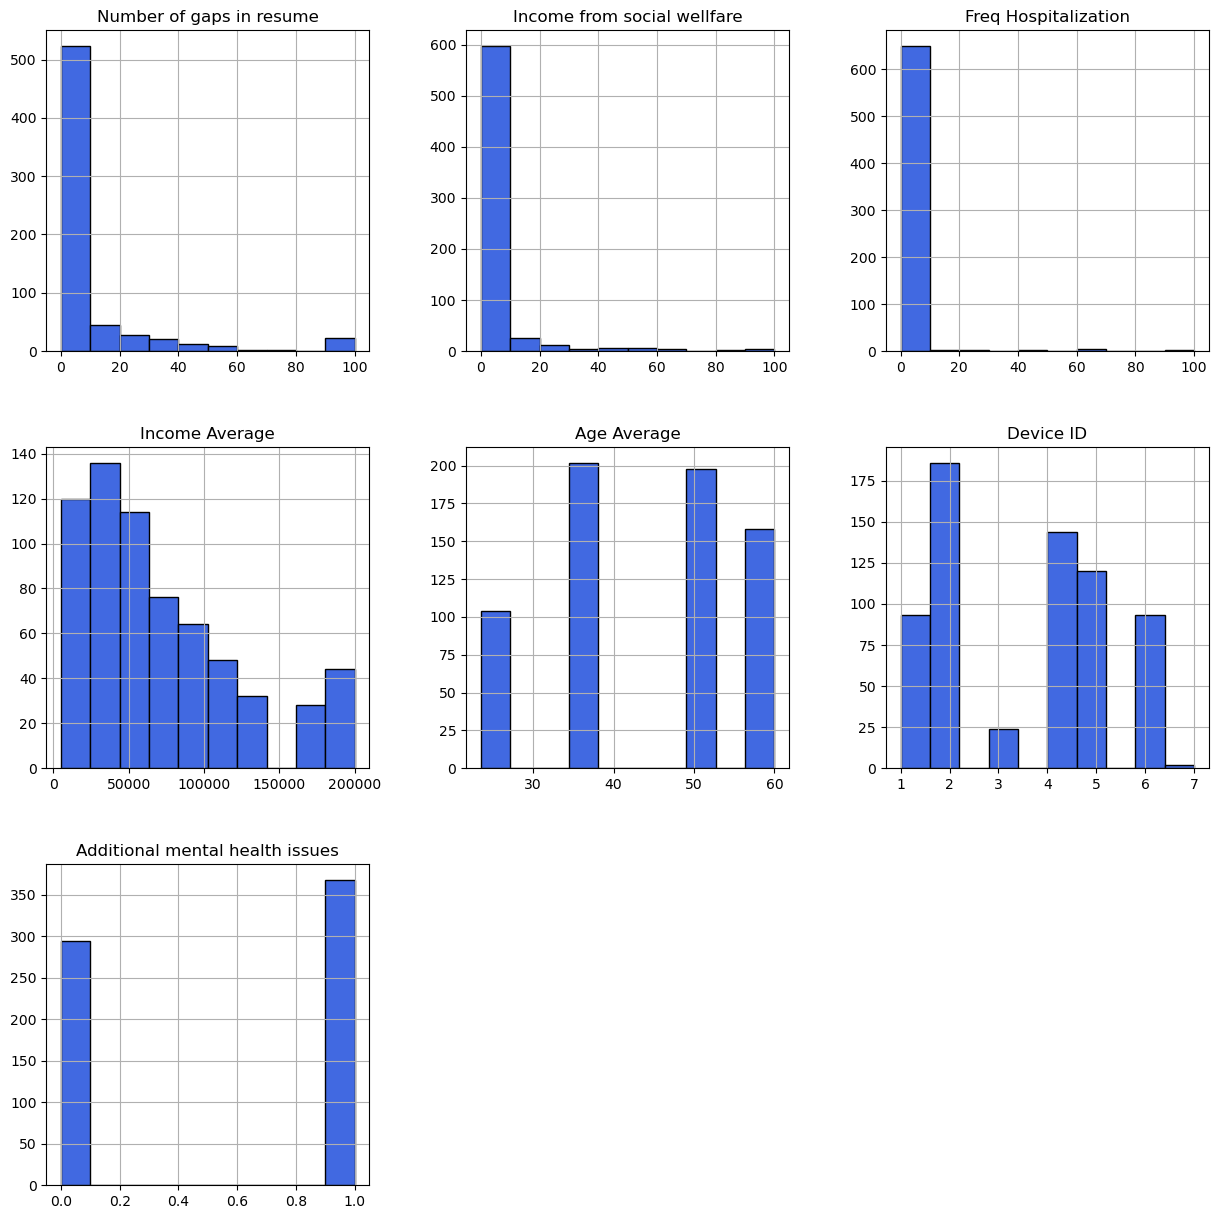

In [1463]:
numeric_ga_df=ga_df.select_dtypes(np.number) 
cols_to_keep = numeric_ga_df.columns[~numeric_ga_df.columns.str.startswith('index')]
numeric_ga_df = numeric_ga_df.loc[:, cols_to_keep]
numeric_ga_df.hist(figsize=(15,15), color='royalblue', edgecolor='black');

There are outliers in the number of gaps in the resume, since it doesn't seem possible that there are people with a 100 gaps in their resume. Additionally, it was considered that more than 60 hospitalizations were also outliers. 

As for the number of gaps, it was decided to replace those entries with the mean value for the whole column. The same was done for the number of hospitalizations. 

In [1464]:
entries_gap_20 = ga_df[ga_df['Number of gaps in resume'] > 40]
entries_gap_20

,Timestamp,Mental Illness,Education level,Additional device,Hospitalized for mental illness,Employment status,Legal disability,Access to internet,Living w/parents,Gap in resume,Number of gaps in resume,Income from social wellfare,Food stamps,Section 8 housing,Freq Hospitalization,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Income Average,Age Average,Device,Device ID,Additional mental health issues
3,2018-01-14 22:01:19,Yes,Masters,Yes,Yes,No,Yes,Yes,Yes,Yes,44.0,47.0,No,No,43.0,No,No,Yes,Yes,No,Yes,No,No,30-44,Male,"$10,000-$24,999",East South Central,17499.500000,37.0,Android Phone,1,1.0
31,2018-01-14 09:24:07,Yes,Undergraduate,No,Yes,No,Yes,No,No,Yes,100.0,10.0,Yes,No,5.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,45-60,Female,"$0-$9,999",New England,4999.500000,52.5,Android Phone,1,1.0
33,2018-01-14 09:14:24,Yes,High School,No,No,No,Yes,Yes,No,Yes,100.0,0.0,Yes,Yes,0.0,Yes,Yes,No,No,Yes,No,Yes,No,45-60,Male,"$0-$9,999",Mountain,4999.500000,52.5,Android Phone,1,1.0
51,2018-01-14 08:17:51,No,High School,Yes,No,No,No,Yes,No,Yes,97.0,0.0,Yes,Yes,0.0,No,Yes,No,No,No,No,Yes,No,30-44,Female,"$10,000-$24,999",New England,17499.500000,37.0,Android Phone,1,1.0
60,2018-01-14 07:37:57,No,High School,No,No,No,No,Yes,No,Yes,100.0,0.0,No,No,0.0,No,Yes,Yes,No,No,Yes,No,No,30-44,Female,"$0-$9,999",Pacific,4999.500000,37.0,Android Phone,1,1.0
64,2018-01-14 06:44:19,No,High School,No,No,No,No,Yes,No,Yes,100.0,0.0,No,No,0.0,No,Yes,No,No,No,No,No,Yes,30-44,Female,"$25,000-$49,999",Pacific,37499.500000,37.0,Android Phone,1,1.0
66,2018-01-14 06:10:15,Yes,Undergraduate,Yes,Yes,Yes,No,Yes,No,Yes,59.0,0.0,No,No,1.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,18-29,Female,"$125,000-$149,999",South Atlantic,137499.500000,23.5,Android Phone,1,1.0
76,2018-01-14 05:14:46,Yes,Undergraduate,Yes,No,No,Yes,Yes,No,Yes,52.0,14.0,Yes,No,0.0,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,30-44,Female,"$10,000-$24,999",East South Central,17499.500000,37.0,Android Phone,1,1.0
82,2018-01-14 04:27:50,Yes,High School,Yes,Yes,No,Yes,Yes,No,Yes,73.0,13.0,Yes,No,4.0,Yes,No,Yes,No,No,Yes,No,Yes,45-60,Female,"$0-$9,999",East North Central,4999.500000,52.5,Android Phone,1,1.0
86,2018-01-14 04:09:17,No,High School,Yes,No,No,No,Yes,No,Yes,66.0,2.0,No,No,0.0,No,Yes,No,No,No,Yes,No,No,30-44,Female,"$75,000-$99,999",Middle Atlantic,87499.500000,37.0,Android Phone,1,1.0


In [1465]:
new_gap = ga_df[ga_df['Number of gaps in resume'] <= 40]['Number of gaps in resume'].mean()

ga_df.loc[ga_df['Number of gaps in resume'] > 40, 'Number of gaps in resume'] = new_gap

ga_df['Number of gaps in resume'].value_counts(dropna=False)

Number of gaps in resume
0.000000     430
3.607143      46
1.000000      40
24.000000     14
2.000000      12
6.000000      10
18.000000     10
3.000000      10
12.000000     10
30.000000      8
10.000000      6
9.000000       6
36.000000      6
7.000000       6
5.000000       6
22.000000      4
32.000000      4
11.000000      4
28.000000      4
13.000000      4
14.000000      4
15.000000      4
16.000000      2
21.000000      2
8.000000       2
33.000000      2
4.000000       2
23.000000      2
20.000000      2
Name: count, dtype: int64

In [1466]:
entries_hosp_60 = ga_df[ga_df['Freq Hospitalization'] > 60]
entries_hosp_60

,Timestamp,Mental Illness,Education level,Additional device,Hospitalized for mental illness,Employment status,Legal disability,Access to internet,Living w/parents,Gap in resume,Number of gaps in resume,Income from social wellfare,Food stamps,Section 8 housing,Freq Hospitalization,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Income Average,Age Average,Device,Device ID,Additional mental health issues
26,2018-01-14 10:06:45,No,High School,Yes,No,Yes,No,Yes,Yes,Yes,11.0,2.0,No,No,69.0,No,No,No,No,No,Yes,Yes,No,45-60,Female,"$0-$9,999",West South Central,4999.5,52.5,Android Phone,1,1.0
65,2018-01-14 06:40:15,No,Undergraduate,Yes,Yes,No,No,Yes,No,No,1.0,10.0,Yes,Yes,69.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,30-44,Female,"$25,000-$49,999",Pacific,37499.5,37.0,Android Phone,1,1.0
157,2018-01-14 10:06:45,No,High School,Yes,No,Yes,No,Yes,Yes,Yes,11.0,2.0,No,No,69.0,No,No,No,No,No,Yes,Yes,No,45-60,Female,"$0-$9,999",West South Central,4999.5,52.5,Tablet,2,1.0
205,2018-01-14 08:02:44,Yes,High School,Yes,Yes,Yes,No,Yes,No,No,0.0,0.0,No,No,100.0,No,Yes,Yes,Yes,Yes,Yes,Yes,No,30-44,Female,"$50,000-$74,999",Mountain,62499.5,37.0,Tablet,2,1.0
234,2018-01-14 06:40:15,No,Undergraduate,Yes,Yes,No,No,Yes,No,No,1.0,10.0,Yes,Yes,69.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,30-44,Female,"$25,000-$49,999",Pacific,37499.5,37.0,Tablet,2,1.0
629,2018-01-14 08:02:44,Yes,High School,Yes,Yes,Yes,No,Yes,No,No,0.0,0.0,No,No,100.0,No,Yes,Yes,Yes,Yes,Yes,Yes,No,30-44,Female,"$50,000-$74,999",Mountain,62499.5,37.0,iOS Phone,6,1.0


In [1467]:
new_hosp = ga_df.loc[ga_df['Freq Hospitalization'] <= 60, 'Freq Hospitalization'].mean()

ga_df.loc[ga_df['Freq Hospitalization'] > 60, 'Freq Hospitalization'] = new_hosp

ga_df['Freq Hospitalization'].value_counts(dropna=False)



Freq Hospitalization
0.000000     576
1.000000      46
3.000000       8
0.490854       6
5.000000       6
4.000000       6
2.000000       4
43.000000      2
19.000000      2
7.000000       2
20.000000      2
6.000000       2
Name: count, dtype: int64

# Saving data types and cleaned dataset

***
Once the data was cleaned, the datatypes were corrected, there were no missing values and no outliers, it was necessary to save the data types separately; since with different actions within the analysis section, the datatypes could potentially be reset.   

In [1468]:
types = ga_df.dtypes
types.to_csv('./data/dtypes_mental_health_survey_clean.csv')
types = pd.read_csv('./data/dtypes_mental_health_survey_clean.csv', 
                    index_col=0).to_dict()['0']

In [1469]:
ga_df.to_csv('./data/mental_health_survey_clean.csv')

In [1470]:
ga_df = pd.read_csv('./data/mental_health_survey_clean.csv')

for col, dtype in types.items():
    ga_df[col] = ga_df[col].astype(dtype)

In [1471]:
ga_df['Mental Illness']

0       No
1       No
2      Yes
3      Yes
4       No
      ... 
657     No
658     No
659    Yes
660     No
661     No
Name: Mental Illness, Length: 662, dtype: category
Categories (2, object): ['No', 'Yes']

In [1472]:
ga_df = ga_df.drop('Unnamed: 0', axis=1)

# EDA Exploratory Data Analysis

***
The next step was to analyze the clean data. For this purpose, different types of analysis were carried out: firstly, the descriptive statistics for numerical data and descriptive graphs for categorical data were created. This was done to know the demographical information related to the respondents. Secondly, a correlation test was created with a heatmap; since valuable insights could be drawn by analyzing which variables are correlated to one another. And finally, a series of grouping analysis were done, by choosing certain variables and seeing their effect on mental illnesses and mental health issues. 

**4.1 Descriptive Statistics for numerical data.** 

In [1473]:
cols_index = numeric_ga_df.columns[~numeric_ga_df.columns.str.startswith('index')]
numeric_ga_df = numeric_ga_df.loc[:, cols_index]
numeric_ga_df.describe()

,Number of gaps in resume,Income from social wellfare,Freq Hospitalization,Income Average,Age Average,Device ID,Additional mental health issues
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,8.574018,3.356495,1.205438,72264.294203,45.004532,3.451662,0.555891
std,20.784969,12.536897,8.145060,51848.887098,12.763974,1.702518,0.497242
min,0.000000,0.000000,0.000000,4999.500000,23.500000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,37499.500000,37.000000,2.000000,0.000000
50%,0.000000,0.000000,0.000000,62499.500000,52.500000,4.000000,1.000000
75%,5.000000,0.000000,0.000000,87499.500000,52.500000,5.000000,1.000000
max,100.000000,100.000000,100.000000,200000.000000,60.000000,7.000000,1.000000


In [1474]:
median_sw = ga_df['Income from social wellfare'].median()
mode_sw = ga_df['Income from social wellfare'].mode()
median_hosp = ga_df['Freq Hospitalization'].median()
mode_hosp = ga_df['Freq Hospitalization'].mode()
median_income = ga_df['Income Average'].median()
mode_income = ga_df['Income Average'].mode()
mode_device = ga_df['Device ID'].mode()

print('Median income obtained from social welfare programs:', round(median_sw, 2))
print('Mode income obtained from social welfare programs:', round(mode_sw.iloc[0], 2))  # mode returns a Series, use .iloc[0]
print('')

print('Median amount of mental health-related hospitalizations:', round(median_hosp, 2))
print('Mode amount of mental health-related hospitalizations:', round(mode_hosp.iloc[0], 2))
print('')

print('Median income across respondents:', round(median_income, 2))
print('Mode income across respondents:', round(mode_income.iloc[0], 2))
print('')

print('Mode device used for survey:', round(mode_device.iloc[0], 2))

Median income obtained from social welfare programs: 0.0
Mode income obtained from social welfare programs: 0.0

Median amount of mental health-related hospitalizations: 0.0
Mode amount of mental health-related hospitalizations: 0.0

Median income across respondents: 62499.5
Mode income across respondents: 37499.5

Mode device used for survey: 2


<div class="alert alert-block alert-success">
Insights about numerical descriptive statistics:
    
- On average, respondents have 8 gaps in their resumes. Which means that they have periods of time that are unaccounted for in their resumes (meaning that they did not have a job). 
- Most respondents do not receive aid from social wellfare programs. 
- Most respondents have never been hospitalized by a mental health issue. However, on average, they have been hospitalized 8 times. 
- Since money related variables tend to bias the mean (because it is sensitive to extreme values), the median was calculated. From it, it can be seen that the income across respondents is around $62,499. 
- The average age of respondents is 45 y/o. 
- Most respondents answered the survey through a Tablet (ID: 2) 

**4.1.2 Descriptive graphs for categorical data.** 

The general insights are shown after all of the graphs. 

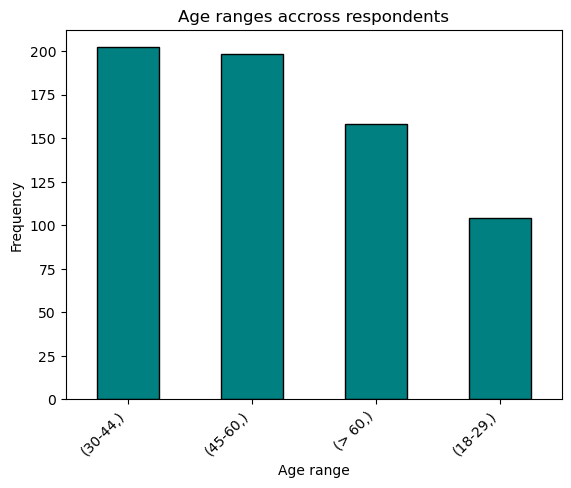

In [1475]:
ga_df[['Age']].value_counts().plot(kind='bar', color='teal', edgecolor='black')

plt.xlabel('Age range')
plt.ylabel('Frequency')
plt.title('Age ranges accross respondents')
plt.xticks(rotation=45, ha='right');

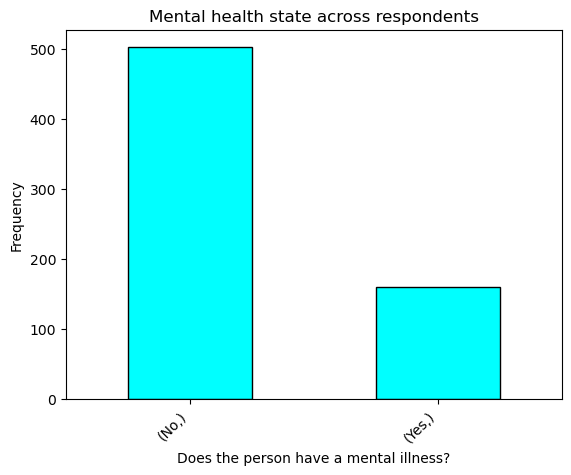

In [1476]:
ga_df[['Mental Illness']].value_counts().plot(kind='bar', color='cyan', edgecolor='black')

plt.xlabel('Does the person have a mental illness?')
plt.ylabel('Frequency')
plt.title('Mental health state across respondents')
plt.xticks(rotation=45, ha='right')
plt.show()

In [1477]:
condition1 = ga_df['Mental Illness'] == 'No'
perc_no_mh1 = condition1.sum() / len(ga_df['Mental Illness']) * 100

condition2 = ga_df['Mental Illness'] == 'Yes'
perc_no_mh2 = condition2.sum() / len(ga_df['Mental Illness']) * 100

print('% of respondents that do not have a mental illness:', perc_no_mh1)
print('% of respondents that do have a mental illness:', perc_no_mh2)


% of respondents that do not have a mental illness: 75.83081570996978
% of respondents that do have a mental illness: 24.169184290030213


In [1478]:
ga_df['Mental Illness'].value_counts()

Mental Illness
No     502
Yes    160
Name: count, dtype: int64

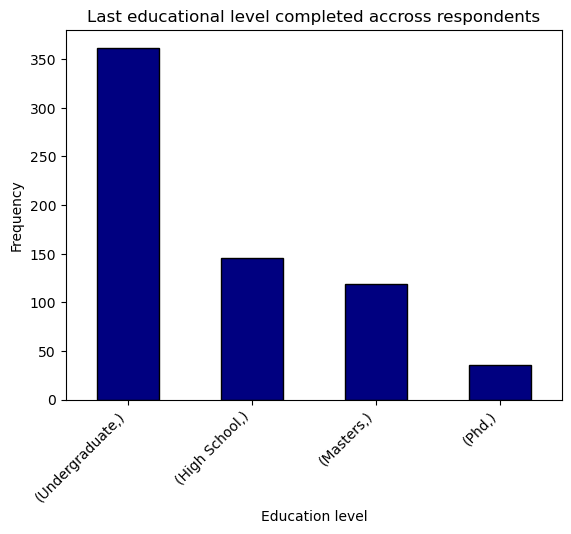

In [1479]:
ga_df[['Education level']].value_counts().plot(kind='bar', color='navy', edgecolor='black')

plt.xlabel('Education level')
plt.ylabel('Frequency')
plt.title('Last educational level completed accross respondents')
plt.xticks(rotation=45, ha='right');

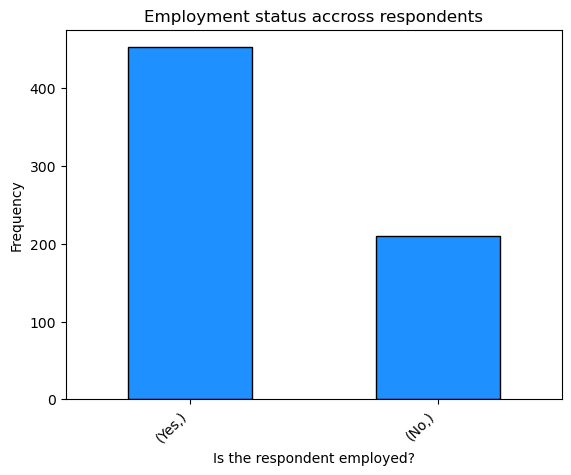

In [1480]:
ga_df[['Employment status']].value_counts().plot(kind='bar', color='dodgerblue', edgecolor='black')

plt.xlabel('Is the respondent employed?')
plt.ylabel('Frequency')
plt.title('Employment status accross respondents')
plt.xticks(rotation=45, ha='right');

In [1481]:
condition1 = ga_df['Employment status'] == 'No'
perc_no_mh1 = condition1.sum() / len(ga_df['Employment status']) * 100

condition2 = ga_df['Employment status'] == 'Yes'
perc_no_mh2 = condition2.sum() / len(ga_df['Employment status']) * 100

print('% of respondents that do not have a job:', perc_no_mh1)
print('% of respondents that do have a job:', perc_no_mh2)

% of respondents that do not have a job: 31.722054380664655
% of respondents that do have a job: 68.27794561933534


''

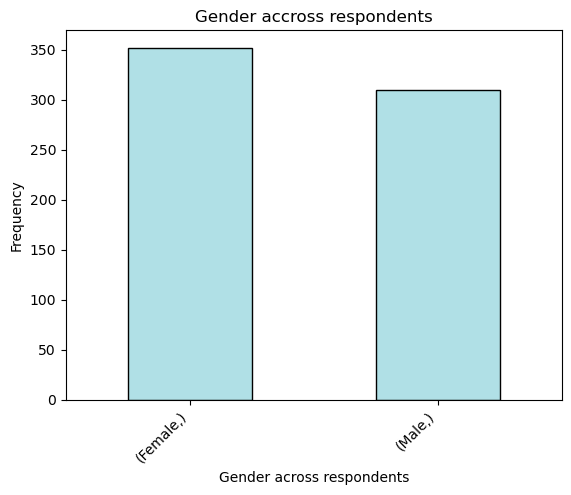

In [1482]:
ga_df[['Gender']].value_counts().plot(kind='bar', color='powderblue', edgecolor='black')

plt.xlabel('Gender across respondents')
plt.ylabel('Frequency')
plt.title('Gender accross respondents')
plt.xticks(rotation=45, ha='right')
;

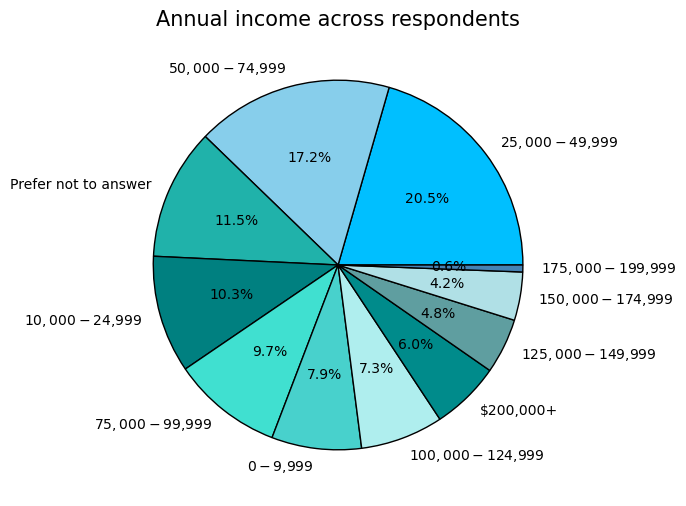

In [1483]:
plt.figure(figsize=(6, 6))

ga_df['Household Income'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops=dict(edgecolor='black'), colors=['deepskyblue', 'skyblue', 'lightseagreen', 'teal', 'turquoise', 'mediumturquoise', 'paleturquoise', 'darkcyan', 'cadetblue', 'powderblue', 'steelblue' ])

plt.xlabel('')
plt.ylabel('')

plt.title('Annual income across respondents', fontsize=15)

plt.show()

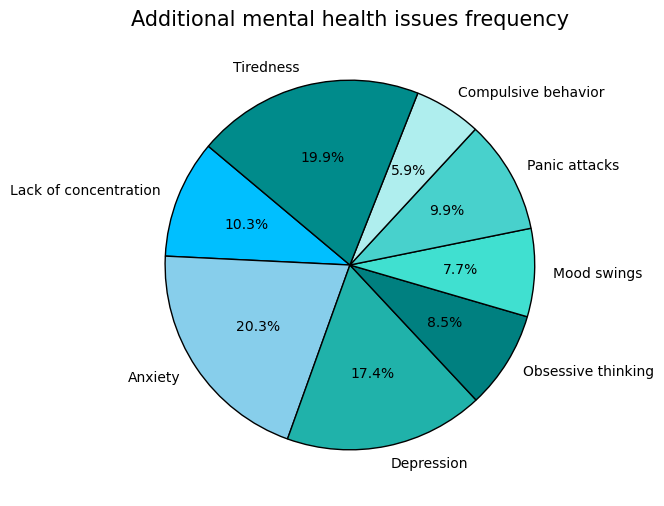

In [1484]:
counts_df = ga_df[mh_cols].applymap(lambda x: 1 if x == 'Yes' else 0)
yes_counts = counts_df.sum()

plt.figure(figsize=(6, 6))
plt.pie(yes_counts, labels=yes_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='black'), colors=['deepskyblue', 'skyblue', 'lightseagreen', 'teal', 'turquoise', 'mediumturquoise', 'paleturquoise', 'darkcyan'])
plt.title('Additional mental health issues frequency', fontsize=15)
plt.show()

<div class="alert alert-block alert-success">

Insights about descriptive graphs:

- Most respondents are within the 30-44 y/old range. 
- 24% of respondents consider that they have a mental illness. 76% of respondents do not. 
- Most respondents have an Undergraduate degree as their last educational degree. 
- 68% of respondents have a job. 32% do not have one. 
- Most respondents were female. 
- Most respondents (20.5%) have an income that is within the 25K-49K dollar range. The second most common income across respondents is between the range 50k-74k dollars. 
- Most common mental health issue is Anxiety with 20%. This was calculated by adding the entries for respondents that answered that they have this mental health issue. The same is true for the rest. Anxiety is followed by Tiredness and Depression. 

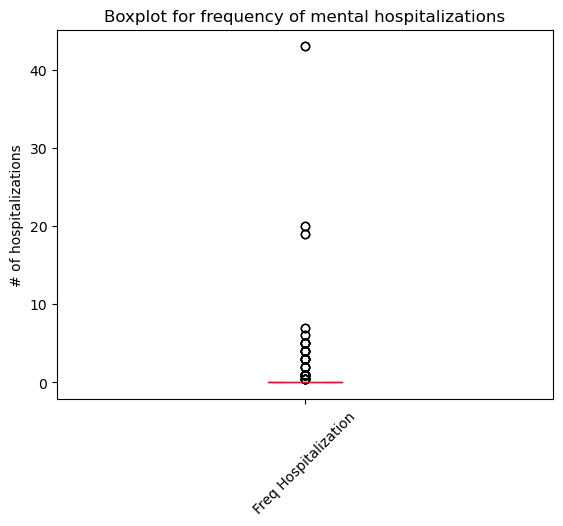

In [1485]:
boxprops = dict(color='royalblue')
ga_df[['Freq Hospitalization']].plot(kind='box', rot=45,  patch_artist=True, color=dict(boxes='blue', whiskers='black', medians='crimson', caps='ghostwhite'));

plt.title('Boxplot for frequency of mental hospitalizations')
plt.ylabel('# of hospitalizations')
plt.xlabel('');

<div class="alert alert-block alert-success">

Insights about boxplot:

- In this graph, it can be seen that most respondents have never been hospitalized for mental health issues. However, there are also respondents that have been hospitalized under 10 times, between 20 times and even more than 40 times. 

Although, since the amount of respondents that answered that they have been hospitalized more than once was not common, in the boxplot they are presented as outliers. 

**4.2 Correlation test**

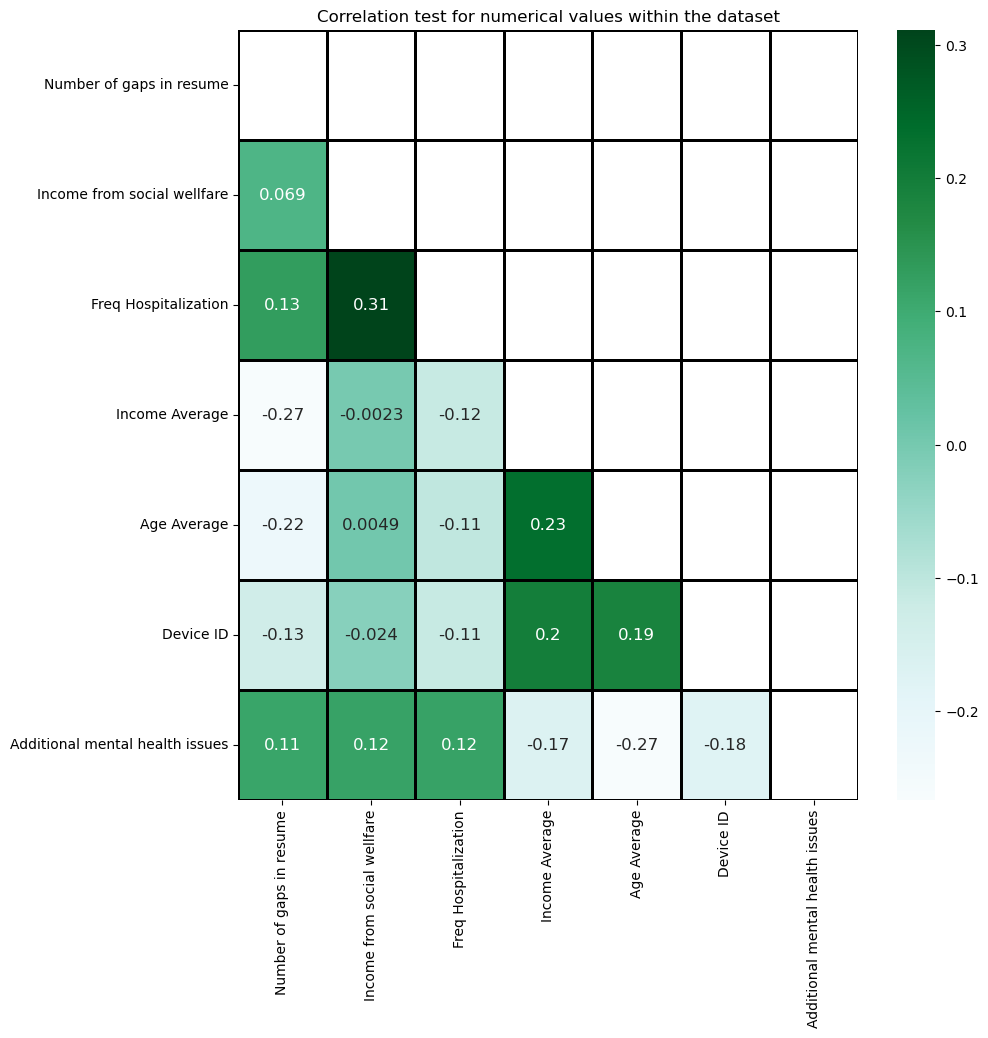

In [1486]:
plt.figure(figsize=(10, 10))

columns_to_exclude = ['index']
filtered_columns = [col for col in ga_df.columns if col not in columns_to_exclude]
filtered_df = ga_df[filtered_columns]
xticklabels_kws = {'fontsize': 10}

mask = np.triu(np.ones_like(filtered_df.select_dtypes(np.number).corr(), dtype=bool))

# Increase font size for annotations
annot_kws = {'size': 12}

sns.heatmap(filtered_df.select_dtypes(np.number).corr(),
            annot=True,
            cmap='BuGn',
            mask=mask,
            linewidths=1,
            linecolor='black',
            annot_kws=annot_kws)

plt.title('Correlation test for numerical values within the dataset', fontsize=12)
plt.xticks(rotation=90, **xticklabels_kws)
plt.yticks(rotation=0, **xticklabels_kws)
plt.show();

<div class="alert alert-block alert-success">

Insights about correlation tests:

1. There is a negative small correlation between income, age and number of gaps in someone's resume. This could indicate that the amount of gaps a person has in their resume is inversely related to their age and income level. In other words, the more amount of gaps in a person's resume, the smaller is their age and income level. 
2. There is a moderate positive correlation between the frequency a person has been hospitalized due to their mental health and the income someone receives from social wellfare programs. 
3. There is a small positive correlation between the age someone has and the income level they receive. 
4. There is also a small correlation between the device respondents used to answer the survey and their income level and age. 
5. There is a small negative correlation between having additional mental health issues (such as Anxiety, Depression, Mood Swings, Tiredness, among others) and the respondent's age. This indicates that if one increases, the other decreases. Meaning that older respondents present less additional mental health issues. 

**4.3 Grouping variables**

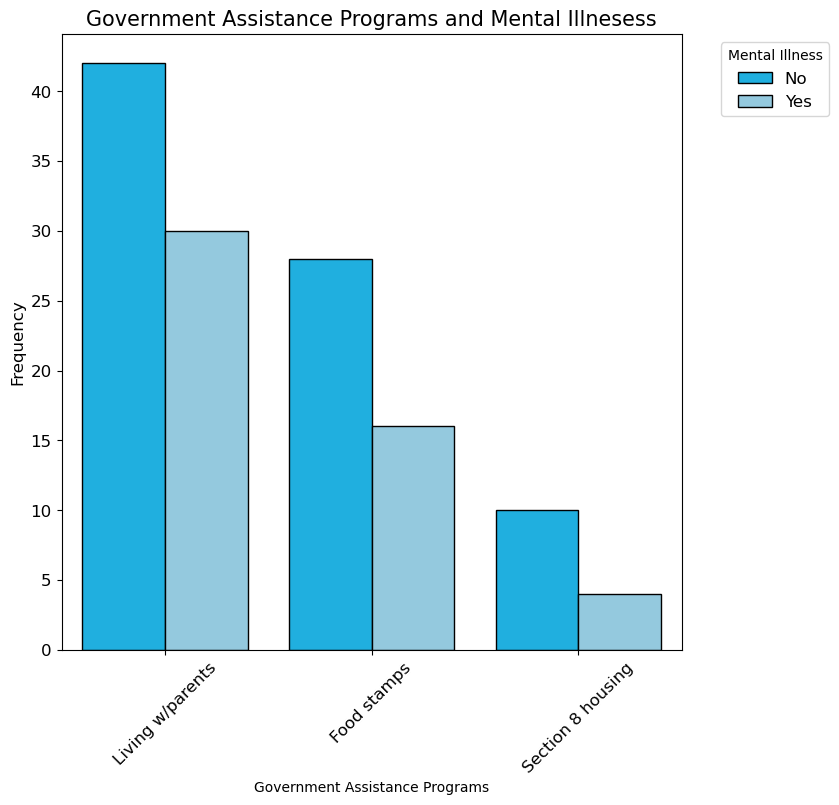

,value,variable,Mental Illness,count
0,No,Section 8 housing,No,492
1,No,Food stamps,No,474
2,No,Living w/parents,No,460
3,No,Section 8 housing,Yes,156
4,No,Food stamps,Yes,144
5,No,Living w/parents,Yes,130
6,Yes,Living w/parents,No,42
7,Yes,Living w/parents,Yes,30
8,Yes,Food stamps,No,28
9,Yes,Food stamps,Yes,16


In [1487]:
gov_help = ['Food stamps', 'Living w/parents', 'Section 8 housing']

df_melt = ga_df.melt(id_vars=['Mental Illness'], value_vars=gov_help)

count_values = df_melt[['value', 'variable', 'Mental Illness']].value_counts()
count_values = pd.DataFrame(count_values).reset_index()

filtered_df = count_values[count_values['value'] == 'Yes']

plt.figure(figsize=(8, 8))
sns.set_palette(['deepskyblue', 'skyblue', 'lightseagreen', 'teal'])
ax = sns.barplot(data=filtered_df, x='variable', y='count', hue='Mental Illness', edgecolor='black',errcolor='none')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Mental Illness', fontsize=12)
plt.xlabel('Government Assistance Programs')
plt.ylabel('Frequency', fontsize=12)
plt.title('Government Assistance Programs and Mental Illnesess', fontsize=15)

plt.show()
count_values                                          

In [1488]:
living_parents = count_values[count_values['variable'] == 'Living w/parents']

no_living_parents_no_mental_illness = living_parents[
    (living_parents['Mental Illness'] == 'No') &
    (living_parents['value'] == 'No')]
total_people_no_living_no_mental = no_living_parents_no_mental_illness['count'].sum()
percentage_no_living_no_mental = (total_people_no_living_no_mental / len(ga_df)) * 100

no_living_parents_yes_mental_illness = living_parents[
    (living_parents['Mental Illness'] == 'Yes') &
    (living_parents['value'] == 'No')]
total_people_no_living_yes_mental = no_living_parents_yes_mental_illness['count'].sum()
percentage_no_living_yes_mental = (total_people_no_living_yes_mental / len(ga_df)) * 100

yes_living_parents_no_mental_illness = living_parents[
    (living_parents['Mental Illness'] == 'No') &
    (living_parents['value'] == 'Yes')]
total_people_living_no_mental = yes_living_parents_no_mental_illness['count'].sum()
percentage_living_no_mental = (total_people_living_no_mental / len(ga_df)) * 100

yes_living_parents_yes_mental_illness = living_parents[
    (living_parents['Mental Illness'] == 'Yes') &
    (living_parents['value'] == 'Yes')]
total_people_living_yes_mental = yes_living_parents_yes_mental_illness['count'].sum()
percentage_living_yes_mental = (total_people_living_yes_mental / len(ga_df)) * 100

print(f"Percentage of respondents that do not live w/parents and do not have mental illness: {percentage_no_living_no_mental:.2f}%")
print(f"Percentage of respondents that do not live w/parents and have mental illness: {percentage_no_living_yes_mental:.2f}%")
print(f"Percentage of respondents that live w/parents and do not have mental illness: {percentage_living_no_mental:.2f}%")
print(f"Percentage of respondents that live w/parents and have mental illness: {percentage_living_yes_mental:.2f}%")


Percentage of respondents that do not live w/parents and do not have mental illness: 69.49%
Percentage of respondents that do not live w/parents and have mental illness: 19.64%
Percentage of respondents that live w/parents and do not have mental illness: 6.34%
Percentage of respondents that live w/parents and have mental illness: 4.53%


<div class="alert alert-block alert-success">

Insights from grouping assistance programs and mental illness:

- The majority of respondents (69%) do not live with their parents nor have a diagnosed mental illness. 
- On the other hand, 20% of respondents that do not live with their parents, do have a diagnosed mental illness. 
- As for the respondents that do live with their parents, 6% do not have a mental illness and 5% do. 
- In regards to being recipients of Food Stamps and living in Section 8 housing, the vast majority of respondents answered that they do not receive nor live in this situation. And as for those who did respond that they do, the amount of respondents is too little to make any valid conclusions. However, in the graph it can be seen that there are more respondents who receive food stamps and live on section 8 housing but do not have a diagnosed mental illness. 

In general, from analyzing how mental illness and assistance programs behaved across respondents, it can be inferred that people with mental illness do not necessarily lead dependent lives. But rather are able to lead independent lifestyles in regards to their living situation. 

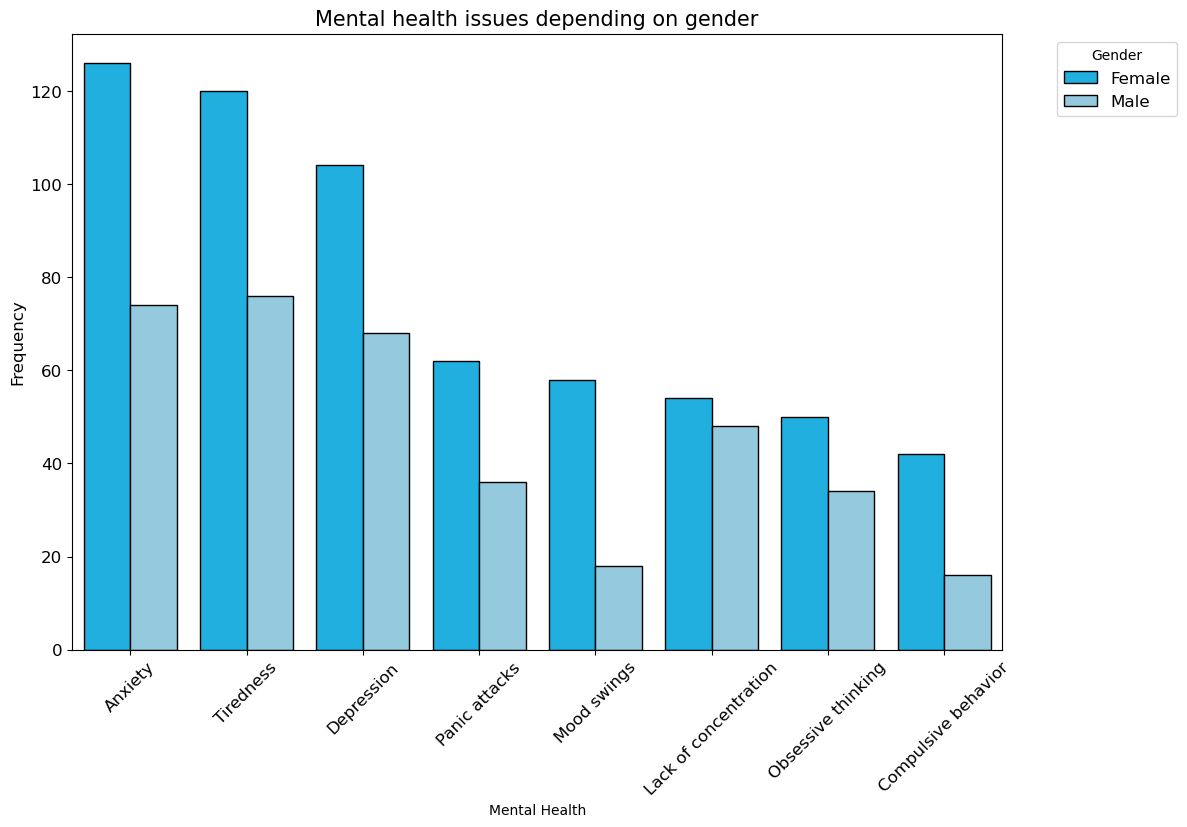

,value,variable,Gender,count
16,Yes,Anxiety,Female,126
17,Yes,Tiredness,Female,120
18,Yes,Depression,Female,104
19,Yes,Tiredness,Male,76
20,Yes,Anxiety,Male,74
21,Yes,Depression,Male,68
22,Yes,Panic attacks,Female,62
23,Yes,Mood swings,Female,58
24,Yes,Lack of concentration,Female,54
25,Yes,Obsessive thinking,Female,50


In [1489]:
mh_cols = ['Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking', 
           'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness']

df_melt = ga_df.melt(id_vars=['Gender'], value_vars=mh_cols)

count_values = df_melt[['value', 'variable', 'Gender']].value_counts()
count_values = pd.DataFrame(count_values).reset_index()

filtered_df = count_values[count_values['value'] == 'Yes']

plt.figure(figsize=(12, 8))
sns.set_palette(['deepskyblue', 'skyblue', 'lightseagreen', 'teal'])
ax = sns.barplot(data=filtered_df, x='variable', y='count', hue='Gender', edgecolor='black')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12,  title='Gender')
plt.xlabel('Mental Health')
plt.ylabel('Frequency', fontsize=12)
plt.title('Mental health issues depending on gender', fontsize=15)
plt.show()
filtered_df

In [1490]:
mh = count_values[count_values['variable'] == 'Anxiety']

male_anxiety = mh[
    (mh['Gender'] == 'Male') &
    (mh['value'] == 'Yes')]
total_male = male_anxiety['count'].sum()
percentage_male_anxiety = (total_male / len(ga_df)) * 100

female_anxiety = mh[
    (mh['Gender'] == 'Female') &
    (mh['value'] == 'Yes')]
total_female = female_anxiety['count'].sum()
percentage_female_anxiety = (total_female / len(ga_df)) * 100


mh2 = count_values[count_values['variable'] == 'Tiredness']

male_tiredness = mh2[
    (mh2['Gender'] == 'Male') &
    (mh2['value'] == 'Yes')]
total_male2 = male_tiredness['count'].sum()
percentage_male_tiredness = (total_male2/ len(ga_df)) * 100

female_tiredness = mh2[
    (mh2['Gender'] == 'Female') &
    (mh2['value'] == 'Yes')]
total_female2 = female_anxiety['count'].sum()
percentage_female_tiredness = (total_female2 / len(ga_df)) * 100

print(f"Percentage of male respondents that have anxiety: {percentage_male_anxiety:.2f}%")
print(f"Percentage of female respondents that have anxiety: {percentage_female_anxiety:.2f}%")
print(f"Percentage of male respondents that have tiredness: {percentage_male_tiredness:.2f}%")
print(f"Percentage of female respondents that have tiredness: {percentage_female_tiredness:.2f}%")


Percentage of male respondents that have anxiety: 11.18%
Percentage of female respondents that have anxiety: 19.03%
Percentage of male respondents that have tiredness: 11.48%
Percentage of female respondents that have tiredness: 19.03%


<div class="alert alert-block alert-success">

Insights about gender and mental health issues: 

- Female respondents are more prone to having additional mental health issues than male respondent. 
- The most common mental issue amongst female respondents is Anxiety; followed by Tiredness and Depression. 
- The most common mental issue amongst male respondents is Tiredness; followed by Anxiety and Depression. 

In general, from this analysis, it can be inferred that women are more likely to have one of these additional mental health issues; specially Anxiety. 

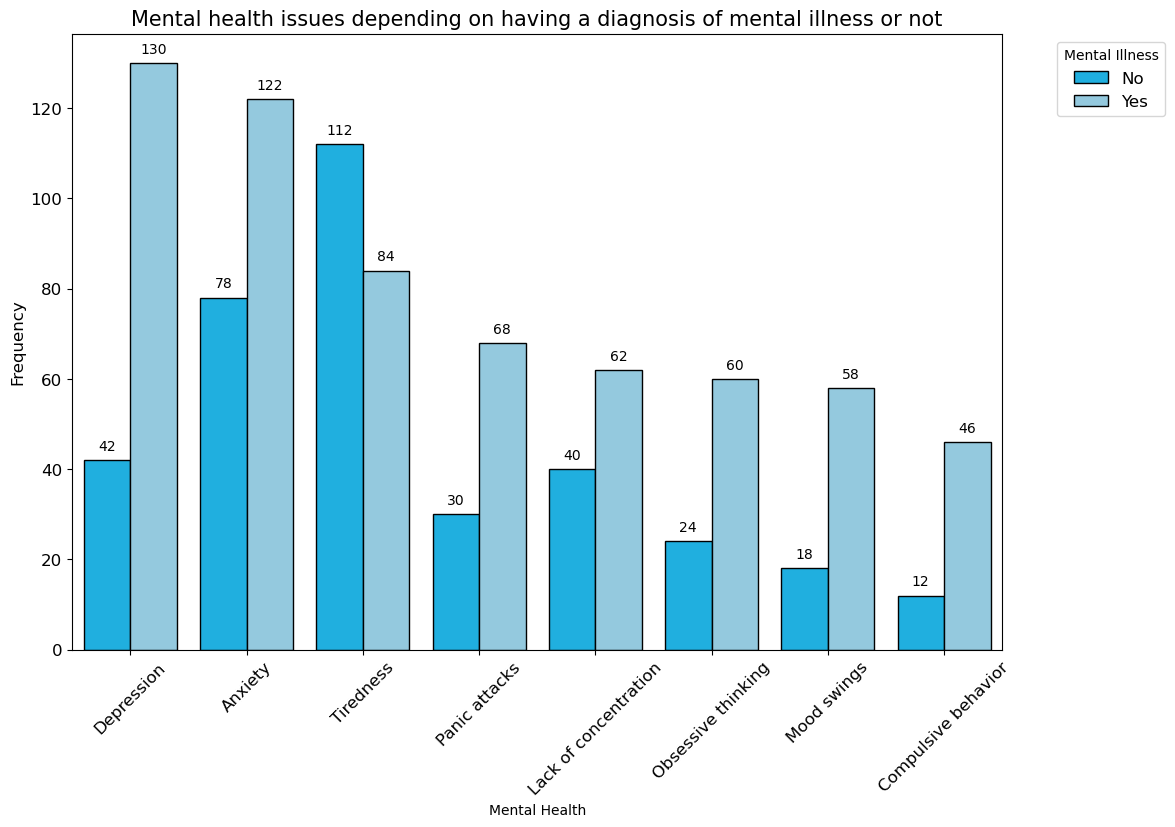

In [1491]:
mh_cols = ['Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking', 
           'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness']

df_melt = ga_df.melt(id_vars=['Mental Illness'], value_vars=mh_cols)

count_values = df_melt[['value', 'variable', 'Mental Illness']].value_counts()
count_values = pd.DataFrame(count_values).reset_index()

# Filter for 'Yes' responses in the mh_cols
filtered_df = count_values[count_values['value'] == 'Yes']

plt.figure(figsize=(12, 8))
sns.set_palette(['deepskyblue', 'skyblue', 'lightseagreen', 'teal'])
ax = sns.barplot(data=filtered_df, x='variable', y='count', hue='Mental Illness', edgecolor='black')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12,  title='Mental Illness')
plt.xlabel('Mental Health')
plt.ylabel('Frequency', fontsize=12)
plt.title('Mental health issues depending on having a diagnosis of mental illness or not', fontsize=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()



In [1492]:
filtered_df

,value,variable,Mental Illness,count
8,Yes,Depression,Yes,130
9,Yes,Anxiety,Yes,122
11,Yes,Tiredness,No,112
16,Yes,Tiredness,Yes,84
17,Yes,Anxiety,No,78
19,Yes,Panic attacks,Yes,68
20,Yes,Lack of concentration,Yes,62
21,Yes,Obsessive thinking,Yes,60
22,Yes,Mood swings,Yes,58
23,Yes,Compulsive behavior,Yes,46


<div class="alert alert-block alert-success">

Insights from grouping Mental Illness answers with other mental health issues

- Respondents who have a diagnosed mental illness answered that they have additional mental health issues with more frequency than those who do not have a mental illness. 
    - The most common issue amongst people who have mental illnesses is Depression; followed by Anxiety and Tiredness. 
- It is interesting that respondents who have not a diagnosed mental illness also present additional mental health issues. The one with more frequency among them, is Tiredness; followed by Panic Attacks. 

Overall, these results indicate that the existence of these mental health issues does not discriminate on basis of mental illnesses. However, they are more common amongst people who do have a diagnosed one. 

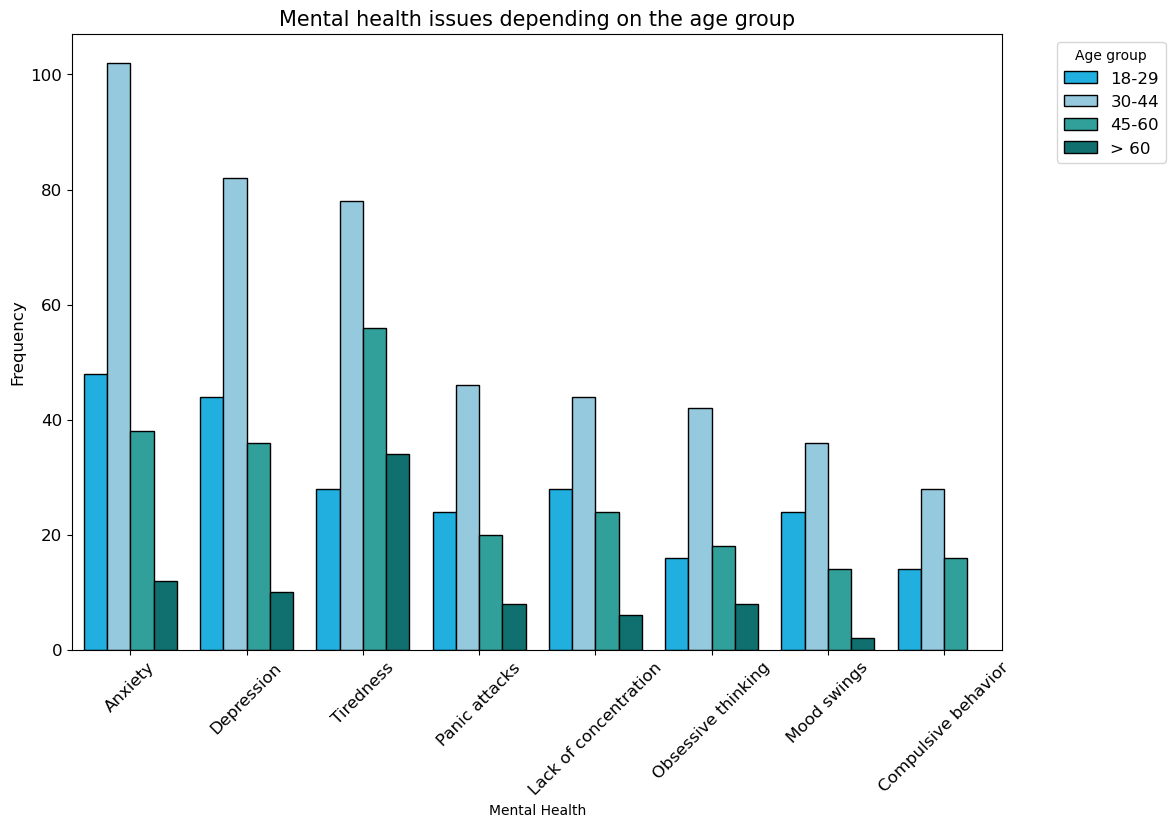

In [1493]:
mh_cols = ['Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking', 
           'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness']

df_melt = ga_df.melt(id_vars = ['Timestamp', 'Age'], value_vars = mh_cols)

count_values = df_melt[['value','variable','Age']].value_counts()
count_values = pd.DataFrame(count_values).reset_index()

filtered_df = count_values[count_values['value'] == 'Yes']

plt.figure(figsize=(12,8))
sns.barplot(data = filtered_df, x = 'variable', y = 'count', hue = 'Age', edgecolor='black', palette=['deepskyblue', 'skyblue', 'lightseagreen', 'teal'])
plt.xticks(rotation=45, fontsize= 12)
plt.yticks(fontsize= 12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize= 12,  title='Age group')
plt.xlabel('Mental Health')
plt.ylabel('Frequency', fontsize=12)
plt.title('Mental health issues depending on the age group', fontsize=15);

<div class="alert alert-block alert-success">

Insights about grouping mental health issues and age range:

1. The age range that presents the most amount of mental health issues is 30-44 y/old. This could be due to the fact that most respondents were this age. 
    1.1 From this age group, the most recurrent mental health issue is Anxiety; followed by Depression and Tiredness. 
    1.2 The least recurrent mental health issue for this age group is compulsive behavior. 

2. Respondents that were >60 y/old presented the lowest levels for all mental health issues. 
    2.1 Respondents within this age group consider that they are more prone to Tiredness. 
    
3. For the 45-60 y/old age range, the most common mental health issue is Tiredness.  

4. For the younger respondents, within the 18-29 age range, the most common mental health issue was Anxiety, followed by Depression and Lack of concentration. 


From these insights, it was interesting to notice a trend in the relationship between Age and the presence of these mental health issues in people's life. In this case, it is possible to infer that as people grow older, their levels of Anxiety and Depression go down and their level of Tiredness goes up. Younger people (ages 18 to 44) are more prone to feeling anxious and depressed, presenting compulsive behaviors, having panic attacks and mood swings. 

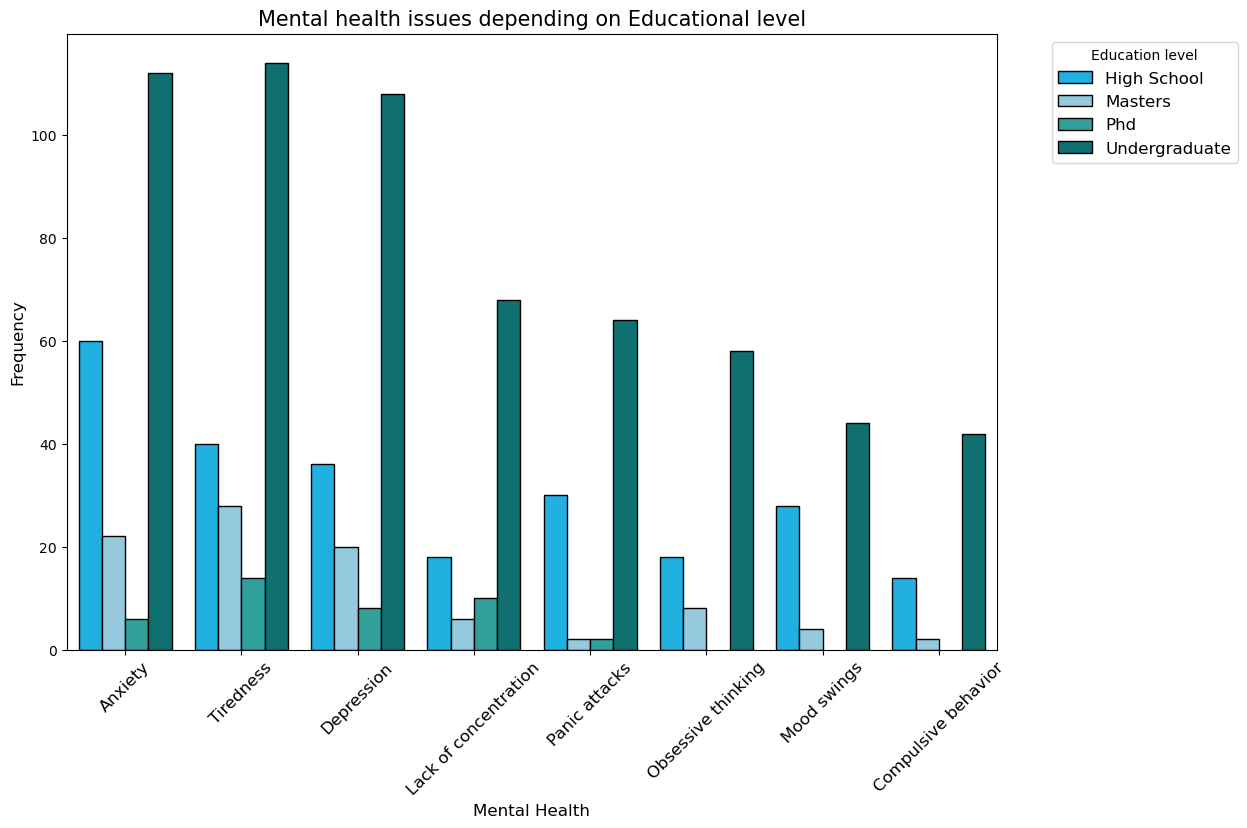

In [1494]:
mh_cols = ['Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking', 
           'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness']

df_melt = ga_df.melt(id_vars=['Timestamp', 'Education level'], value_vars=mh_cols)

count_values = df_melt[['value', 'variable', 'Education level']].value_counts()
count_values = pd.DataFrame(count_values).reset_index()
count_values.columns = ['value', 'variable', 'Education level', 'count']

filtered_df = count_values[count_values['value'] == 'Yes']

order = filtered_df.groupby('variable')['count'].sum().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_df, x='variable', y='count', hue='Education level', edgecolor='black', palette=['deepskyblue', 'skyblue', 'lightseagreen', 'teal'], order=order)
plt.xticks(rotation=45, fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12,  title='Education level')
plt.xlabel('Mental Health', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Mental health issues depending on Educational level', fontsize=15)
plt.show()


<div class="alert alert-block alert-success">

Insights about mental health issues and education levels

1. Respondents that have an undergraduate degree are more prone to present all of the mental health issues listed. In particular, Tiredness, Anxiety and Depression. The big difference between the count of this group vs the others, could be due to the fact that most of the respondents hold an undergraduate degree. 
2. Respondents that hold a High School diploma, present high levels of Anxiety, tiredness and depression. These respondents also present high values for lack of concentration and obsessive thinking 
3. As for respondents that have a Master's Degree, they present high levels of tiredness, compared to anxiety and depression. As for the other ones, they almost do not present them at all; since they are very low. 
4. Finally, for respondents that hold a PhD, they present low levels for all mental health issues. However, the one that presents the highest levels is Tiredness; similar to respondents with Master's degrees. 

From this graph, in general, it can be seen that the higher the degree someone holds, the mental health issues they have also vary. As with the grouping by age, it can be seen that Anxiety switches to Tiredness the higher the degree. Which could be also related to the age of the respondents. 

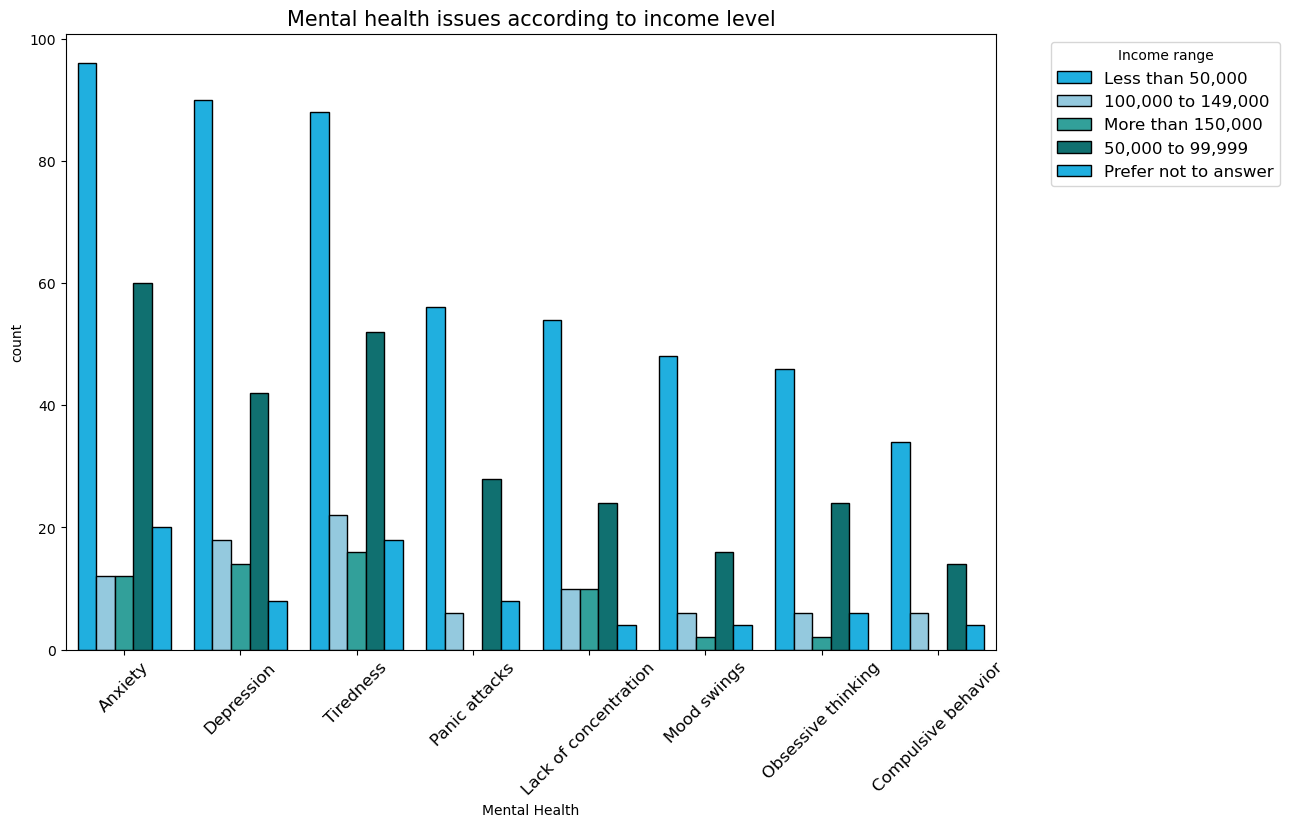

In [1495]:
Household_Income_cat = {'$0-$9,999':'Less than 50,000',
                        '$10,000-$24,999':'Less than 50,000',
                        '$25,000-$49,999':'Less than 50,000', 
                        '$50,000-$74,999': '50,000 to 99,999',
                        '$75,000-$99,999': '50,000 to 99,999', 
                        '$100,000-$124,999': '100,000 to 149,000',
                        '$125,000-$149,999': '100,000 to 149,000', 
                        '$150,000-$174,999':'More than 150,000',
                        '$175,000-$199,999':'More than 150,000',
                        '$200,000+':'More than 150,000'}

ga_df['Income Level'] = ga_df['Household Income'].replace(Household_Income_cat)

mh_cols = ['Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking', 
           'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness']

df_melt = ga_df.melt(id_vars = ['Timestamp', 'Income Level'], value_vars = mh_cols)

count_values = df_melt[['value','variable','Income Level']].value_counts()
count_values = pd.DataFrame(count_values).reset_index()

filtered_df = count_values[count_values['value'] == 'Yes']

plt.figure(figsize=(12,8))
sns.barplot(data = filtered_df, x = 'variable', y = 'count', hue = 'Income Level', edgecolor='black', palette=['deepskyblue', 'skyblue', 'lightseagreen', 'teal'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',  title='Income range', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.title('Mental health issues according to income level', fontsize=15)
plt.xlabel('Mental Health');

<div class="alert alert-block alert-success">

Insights from grouping mental health issues and income levels. 

1. In general, respondents that make less than 50k dollars are more prone to present any of the mental health issues listed. The most mental health issue for respondents that have an income within this range is Anxiety, followed by Depression and Tiredness. 
2. Following the first range, respondents that make within 50k and 99k also present a high count of mental health issues. The most common one being Anxiety, followed by Tiredness and Depression. 
3. As for the respondents who make an income within the ranges 100k-149k and more than 150k, they present low levels of having these mental health issues. 

From this graph, in can be inferred that people who make more money have less mental issues than people who have a lower income. 

In [1496]:
mh_issue = ['Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking', 'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness']

df_melted = pd.melt(ga_df, id_vars=['Employment status'],
                    var_name='Mental Health Issue', value_name='Yes/No')

# Filter the melted DataFrame to include only the specified mental health issues
df_melted_filtered = df_melted[df_melted['Mental Health Issue'].isin(mh_issue)]

# Group by 'Employment status', 'Living w/parents', and 'Mental Health Issue'
grouped_df = df_melted_filtered.groupby(['Employment status', 'Mental Health Issue', 'Yes/No']).size().reset_index(name='Count')

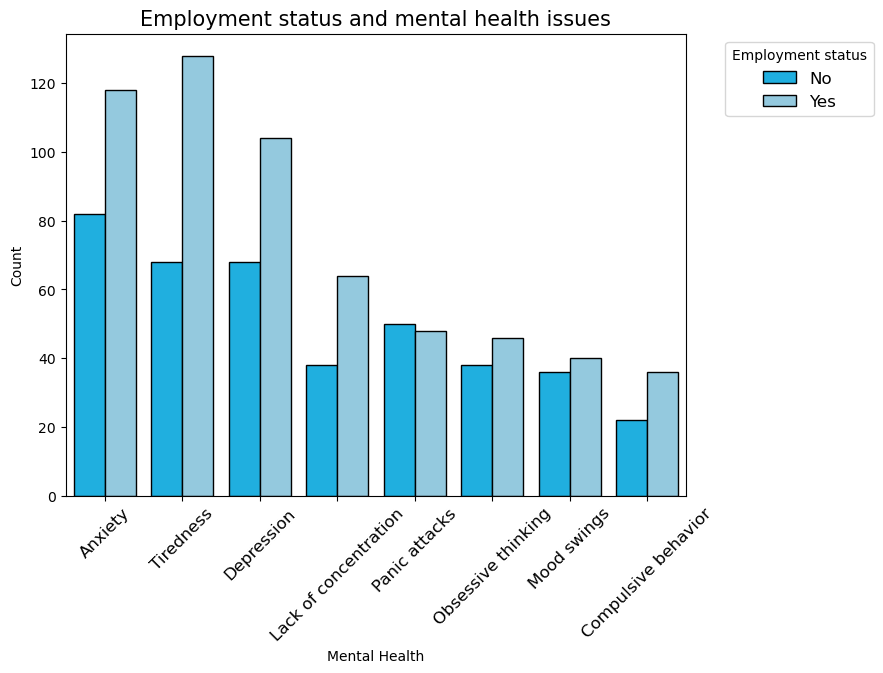

In [1497]:
filtered_df = grouped_df[grouped_df['Yes/No'] == 'Yes']
plt.figure(figsize=(8, 6))

order = filtered_df.groupby('Mental Health Issue')['Count'].sum().sort_values(ascending=False).index

sns.barplot(data=filtered_df, x='Mental Health Issue', y='Count', hue='Employment status', errcolor='none', edgecolor='black', order=order)

plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Mental Health')
plt.title('Employment status and mental health issues', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title='Employment status')
plt.show()

In [1498]:
filtered_df

,Employment status,Mental Health Issue,Yes/No,Count
1,No,Anxiety,Yes,82
3,No,Compulsive behavior,Yes,22
5,No,Depression,Yes,68
7,No,Lack of concentration,Yes,38
9,No,Mood swings,Yes,36
11,No,Obsessive thinking,Yes,38
13,No,Panic attacks,Yes,50
15,No,Tiredness,Yes,68
17,Yes,Anxiety,Yes,118
19,Yes,Compulsive behavior,Yes,36


<div class="alert alert-block alert-success">

Insights from the relationship between mental health issues and employment status

- Respondents who have a job show to have a higher level of mental issues than those who do not have a job. 
- Regardless of the count, for both respondents who have a job and those who don't have one, the levels behave in the same way. Except for Panic attacks, since respondents who do not have a job tend to have more panic attacks than those who do.  
- The mental issue that is most common across respondents who have a job is Tiredness, and as for those who do not have one, is Anxiety. However, respondents that have a job also reported having Anxiety in large amounts.   

Overall, it can be inferred from this graph that people that have a job are more prone to suffer one of these mental health issues; specially Anxiety, Depression and Tiredness. On the other hand, it is interesting to see that those who do not have a job are more prone to suffer from Panic attacks. 

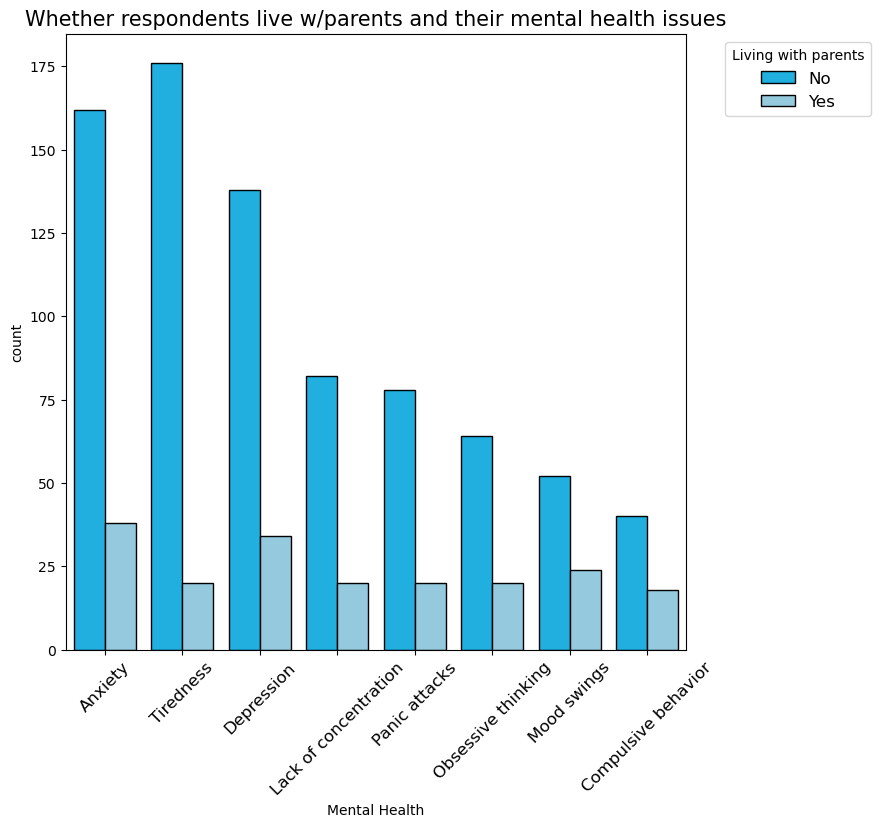

In [1499]:
mh_cols = ['Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking', 
           'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness']

df_melt = ga_df.melt(id_vars=['Living w/parents'], value_vars=mh_cols)

count_values = df_melt[['value', 'variable', 'Living w/parents']].value_counts()
count_values = pd.DataFrame(count_values).reset_index()
count_values.columns = ['value', 'variable', 'Living w/parents', 'count']

filtered_df = count_values[count_values['value'] == 'Yes']
plt.figure(figsize=(8, 8))

sns.barplot(data=filtered_df, x='variable', y='count', hue='Living w/parents', order=order, errcolor='none', edgecolor='black')

plt.xticks(rotation=45, fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title='Living with parents')
plt.xlabel('Mental Health')
plt.title('Whether respondents live w/parents and their mental health issues', fontsize=15);


<div class="alert alert-block alert-success">

Insights about mental illnesses and dependence on parents

- Respondents that do not live with their parents present more additional mental health issues than those who do live with their parents. This could be due to the amount of respondents that do not live with their parents. 
    - In particular, respondents that do not live with their parents showed high levels of Tiredness, Anxiety and Depression. 
- As for respondents that do live with their parents, the most common mental health issue was Anxiety, followed by Depression and Mood Swings. 

In general, from this graph, it can be inferred that the presence of these additional mental health issues does not indicate that a person has to be dependent on their parents. 

# Conclusions

By having analyzed this dataset, related to a survey regarding mental health and employment, it was possible to know the following facts: 

- **Demographic Patterns identified from the dataset's respondents:**
    - The average respondent's age is 45, with the majority of answers falling within the 30-44 age range.
    - Female respondents predominate.  
    - Most respondents have an undergraduate degree.
    - The common income range is $25k-$49k. 
    - 68% of respondents are employed.

- **Mental Health Prevalence:**

    - 24% of respondents reported having a mental illness. This is consistent with what can be observed with larger samples, >according to the NAMI (2023), 1 in 5 adults have a mental illness. 
    - Additional mental health issues, like anxiety, depression, mood swings or panic attacks, are common amongst the whole >population, not only for people with a diagnosed mental illness. However, people with a diagnosed mental illness are more prone >to have them. 
    - Anxiety is the most common additional mental health issue (20%), followed by Tiredness and Depression.
    - Female respondents, on average, are more prone to additional mental health issues, with Anxiety being particularly >prevalent among them.
    
- **Influence of Age:**

    - It was observed that mental health issues vary with age and that younger individuals (18-44) are more prone to anxiety and >depression.
    - On the other hand, older respondents (>60) exhibit lower levels of mental health issues, with a tendency toward tiredness.
    - An interesting finding is that when a person ages, the mental health issues that are most common switch, from being >anxious to being tired. 
    - As people get older, the analysis suggests that the tendency to have an additional mental health issue decreases. 

- **Education and Income Dynamics:**

    - Higher education levels are associated with varying mental health issues; Anxiety tends to shift to Tiredness with >advanced degrees.
    - Higher income levels generally correlate with lower reported mental health issues.

- **Employment Status Impact:**

    - Employed individuals are more likely to report mental health issues, especially Anxiety, Depression, and Tiredness.
    - Unemployed respondents tend to experience more panic attacks.

- **Dependence on Parents and Mental Health:**

    - Living independently does not necessarily correlate with mental health issues. Meaning that people who live on their own are also prone to having additional mental health issues. 
    - Respondents not living with parents exhibit higher levels of additional mental health issues. Being tiredness the most common amongst respondents. 

***

*Now, as for the hypothesis stated at the beginning, these are the conclusions:*

**Hypothesis 1: People with Mental Health Illnesses Lead a Lesser Quality Life**
- Mental health issues are prevalent across various demographic groups; across factors like age, gender, education, income, and >employment status. 
- Therefore, from this dataset, it can be concluded that having a mental illness is not correlated to leading a lesser quality ?>life; at least when talking in terms of income and employment status. 
- However, it is important to remember that individuals with mental health issues, particularly diagnosed mental illnesses, may >experience additional challenges. 

**Hypothesis 2: People with Mental Health Illnesses Depend on Others for Housing and Income**
- Independence in living arrangements does not necessarily correlate with mental health issues.
- Respondents with mental health issues, including diagnosed illnesses, can lead independent lives.
- Mental health issues do not universally lead to dependence on others for housing and income.

# Recommendations

Additional to the conclusions made by analyzing, below there are a few **recommendations** targeted to organizations, regarding the mental health of their employees. This, since the stigmas and prejudices target to people with mental illnesses are often related to their jobs and performance. (Borenstein, 2020) Additionally, the insights that ware made throughout this report could be really helpful for organizations. 

By implementing these recommendations, organizations can contribute to a more supportive and inclusive workplace, fostering the well-being of individuals across diverse demographics.

- **Recognizing and addressing the gender disparity in mental health reporting, and thus providing tailored support for females who are more prone to additional mental health issues, can prove to be beneficial for organizations. Since this can create an environment in which female collaborators can thrive and therefore be more productive. Some examples to consider are:**
    - Mentorship Programs for female collaborators. 
    - Wellness workshops hosted by women focused on challenges that women face. 
    - Women support groups that create safe spaces for open dialogue.  
    - Flexible work schedules. 
    - Leadership training programs. 
<br>
- **Additionally, it is important to consider that the age factor is also very influential. Therefore, another recommendation is to tailor mental health interventions based on age demographics. Recognizing that younger individuals can benefit more from strategies targeting anxiety and depression, while older individuals may require support for tiredness.Some ways in which this can be applied are:**
    - Youth focused workshops, where young people can share their experiences without age biases. 
    - Career support programs, in which advice to prevent burnout and create a healthy career plan. 
    - Cross-generational mentorship programs. 
<br>
- **Knowing that people with jobs are more prone to mental health issues, implementing workplace mental health programs is extremely necessary; since these issues can affect people's performance. To say nothing of the fact that mental health is as important as physical health. Organizations that show that they care about it, demonstrate a commitment to the well-being of their employees. By fostering a workplace culture that prioritizes mental health, organizations can enhance the overall health and happiness of their workforce while also boosting their productivity and satisfaction.**
<br>
- **Finally, as a society in general but also within organizations, there should be targeted mental health initiatives for individuals with lower incomes; knowing that they are more likely to experience mental health issues.**

<br>To wrap up, recognizing and addressing mental health in the workplace is an investment in both human capital and organizational success. The benefits extend beyond the individual to create a healthier, more productive, and sustainable work environment.

# References

-  OpenAI. (2023, December 2). Assistance with Mental Health and Employment Analysis. [ChatGPT conversation]. https://chat.openai.com/
- Borenstein, J. (2020, August). Stigma, prejudice and discrimination against people with mental illness. American Psychiatric Association. https://www.psychiatry.org/patients-families/stigma-and-discrimination
- List of named colors — Matplotlib 3.4.2 documentation. (n.d.). Matplotlib.org. https://matplotlib.org/stable/gallery/color/named_colors.html
- How to Customize Pie Charts using Matplotlib. (2022, July 24). Proclus Academy. https://proclusacademy.com/blog/customize_matplotlib_piechart/
- National Alliance on Mental Illness. (2023, April). Mental health by the numbers. NAMI; National Alliance on Mental Illness. https://www.nami.org/mhstats
- Statistics Solutions. (2023). Pearson’s Correlation Coefficient. Statistics Solutions. https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient/#:~:text=High%20degree%3A%20If%20the%20coefficient
- How to Customize Heatmap in Python (seaborn) - Zebra BI. (2023, July 5). https://zebrabi.com/guide/how-to-customize-heatmap-in-python-seaborn/
- Corley, M. (2018) Unemployment and mental illness survey. Www.kaggle.com. https://www.kaggle.com/datasets/michaelacorley/unemployment-and-mental-illness-survey